In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd '/content/gdrive/MyDrive/Colab Notebooks/Covid_vaccine_modern_datascience_project/data'

/content/gdrive/MyDrive/Colab Notebooks/Covid_vaccine_modern_datascience_project/data


In [3]:
import pandas as pd
tweets  = pd.read_csv('covid_data.csv')

In [4]:
tweets .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252760 entries, 0 to 252759
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Date    252753 non-null  object
 1   User    252753 non-null  object
 2   Tweet   252753 non-null  object
dtypes: object(3)
memory usage: 5.8+ MB


In [5]:
tweets.head()

Date             User  \
0  2021-01-30 23:28:07+00:00    JustinMagrath   
1  2021-01-30 23:10:37+00:00  TheAfricaMentor   
2  2021-01-30 23:09:01+00:00  AndrewFleische7   
3  2021-01-30 23:00:13+00:00        blithe_cb   
4  2021-01-30 22:37:02+00:00     CCVI_Houston   

                                               Tweet  
0  This week I had the opportunity to get my firs...  
1  Novartis pitches in to help produce Pfizer/Bio...  
2  @jkalbrechtsen "The Pfizer-BioNTech COVID-19 v...  
3  Novartis to Help Make Pfizer-BioNTech Covid-19...  
4  Clinicians from CHRISTUS Health in Beaumont, T...

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from string import punctuation
import collections
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import en_core_web_sm
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score

In [7]:
tweets[tweets['Tweet'].duplicated(keep=False)].sort_values('Tweet').head(10)

Date            User  \
191347  2022-02-14 21:01:51+00:00      X3N0N4N0N1   
189421  2022-02-14 21:01:51+00:00      X3N0N4N0N1   
154451  2021-11-29 06:40:26+00:00         rexaczs   
150057  2021-11-29 06:40:26+00:00         rexaczs   
128269  2021-09-16 16:47:29+00:00  CreativeBlueON   
133826  2021-09-16 16:47:29+00:00  CreativeBlueON   
224679  2022-08-15 21:01:23+00:00     TKnights773   
182090  2022-08-15 21:01:23+00:00     TKnights773   
194588  2022-02-06 03:41:31+00:00     elephunk101   
189951  2022-02-06 03:41:31+00:00     elephunk101   

                                                    Tweet  
191347  \nUK Adverse Drug Reactions Data\n\nPfizer/Bio...  
189421  \nUK Adverse Drug Reactions Data\n\nPfizer/Bio...  
154451  " It is therefore also a standard vaccine targ...  
150057  " It is therefore also a standard vaccine targ...  
128269  " Pfizer’s COVID-19 vaccine will now be known ...  
133826  " Pfizer’s COVID-19 vaccine will now be known ...  
224679  " 🇩🇪 The Pfizer–BioNTech COVID-19 vaccine (INN...  
182090  " 🇩🇪 The Pfizer–BioNTech COVID-19 vaccine (INN...  
194588  "#COVID19 #vaccine, #myocarditis to blame for ...  
189951  "#COVID19 #vaccine, #myocarditis to blame for ...

In [8]:
tweets = tweets.drop_duplicates('Tweet')

In [9]:
tweets.head()

Date             User  \
0  2021-01-30 23:28:07+00:00    JustinMagrath   
1  2021-01-30 23:10:37+00:00  TheAfricaMentor   
2  2021-01-30 23:09:01+00:00  AndrewFleische7   
3  2021-01-30 23:00:13+00:00        blithe_cb   
4  2021-01-30 22:37:02+00:00     CCVI_Houston   

                                               Tweet  
0  This week I had the opportunity to get my firs...  
1  Novartis pitches in to help produce Pfizer/Bio...  
2  @jkalbrechtsen "The Pfizer-BioNTech COVID-19 v...  
3  Novartis to Help Make Pfizer-BioNTech Covid-19...  
4  Clinicians from CHRISTUS Health in Beaumont, T...

In [10]:
import string
import re
from bs4 import BeautifulSoup

# Remove URLs from a specific column
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: re.sub(r'http\S+', '', str(x)) if isinstance(x, (str, bytes)) else x)

# Remove HTML tags from a specific column
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: BeautifulSoup(str(x), 'lxml').get_text() if isinstance(x, (str, bytes)) else x)

# Remove punctuation from a specific column
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)) if isinstance(x, (str, bytes)) else x)

# Remove smileys from a specific column
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]+', '', str(x)) if isinstance(x, (str, bytes)) else x)

# Convert Text in a specific column to lowercase
tweets['Tweet'] = tweets['Tweet'].str.lower()

# Remove newline characters from a specific column
tweets['Tweet'] = tweets['Tweet'].str.replace('\n', '')

# Remove "@" symbol from a specific column
tweets['Tweet'] = tweets['Tweet'].str.replace('@', '')


<ipython-input-10-e9defdacd42a>:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  tweets['Tweet'] = tweets['Tweet'].apply(lambda x: BeautifulSoup(str(x), 'lxml').get_text() if isinstance(x, (str, bytes)) else x)


In [11]:
# import locale
# locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')


In [11]:
!pip install langid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import langid

# Convert NaN values to empty strings
tweets['Tweet'] = tweets['Tweet'].fillna('')

# Identify the language of each row in a specific column
tweets['language'] = tweets['Tweet'].apply(lambda x: langid.classify(str(x))[0])

# Keep only the rows where the language is English
tweets = tweets[tweets['language'] == 'en']

In [13]:
tweets.head(10)

Date             User  \
0  2021-01-30 23:28:07+00:00    JustinMagrath   
1  2021-01-30 23:10:37+00:00  TheAfricaMentor   
2  2021-01-30 23:09:01+00:00  AndrewFleische7   
3  2021-01-30 23:00:13+00:00        blithe_cb   
4  2021-01-30 22:37:02+00:00     CCVI_Houston   
5  2021-01-30 22:25:52+00:00     News_By_Nick   
6  2021-01-30 22:17:54+00:00  AndrewFleische7   
7  2021-01-30 22:14:33+00:00  AndrewFleische7   
8  2021-01-30 21:59:16+00:00         unian_en   
9  2021-01-30 21:59:15+00:00        UnianInfo   

                                               Tweet language  
0  this week i had the opportunity to get my firs...       en  
1  novartis pitches in to help produce pfizerbion...       en  
2  jkalbrechtsen the pfizerbiontech covid19 vacci...       en  
3  novartis to help make pfizerbiontech covid19 v...       en  
4  clinicians from christus health in beaumont te...       en  
5   cdc 295 million covid 19 vaccine doses admini...       en  
6  greghuntmp the pfizerbiontech covid19 vaccine ...       en  
7  profpcdoherty the pfizerbiontech covid19 vacci...       en  
8  eu welcomes allocation of 117000 doses of pfiz...       en  
9  eu welcomes allocation of 117000 doses of pfiz...       en

In [14]:
tweets.shape

(206151, 4)

In [15]:
#remove stopwords, punctuations, lemmatize and tokenize word
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nlp = en_core_web_sm.load()
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation) 
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()

            
def furnished(text):
    final_text = []
    for i in w_tokenizer.tokenize(text):
#     for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)


            
tweets.Tweet = tweets.Tweet.apply(furnished)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [16]:
tweets.sample(5)

Date             User  \
33245   2021-03-05 16:39:17+00:00  YolandeVermeer1   
193839  2022-02-15 05:19:03+00:00  skjayarajskjay1   
70327   2021-05-18 04:17:24+00:00  MarthaAlberts17   
88618   2021-06-16 07:50:46+00:00     stevendamron   
66072   2021-05-04 00:57:00+00:00    lockwoodraina   

                                                    Tweet language  
33245   czechia slovakia receive additional 100000 dos...       en  
193839  pfizer moderna covid19 booster effectiveness w...       en  
70327   know nih share patent moderna covid19 vaccine ...       en  
88618   according uk study astrazeneca pfizer covid19 ...       en  
66072   amid development uk study found single dose ei...       en

In [17]:
import en_core_web_sm
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string

In [18]:
# Define the vaccine-related words
Pfizer_related_words = '''BioNTech Pfizer Fosun Pharma BNT162b2'''
Moderna_related_words = '''Moderna NIAID'''
AstraZeneca_related_words = '''Oxford AstraZeneca Vaxzevria'''
Janssen_related_words = '''Janssen JNJ-78436735 J&J Johnson&Johnson JNJ'''
Sputnik_V_related_words = '''Sputnik V Gam-COVID-Vac'''
Sinovac_related_words = '''Sinovac'''
Sinopharm_related_words = '''Sinopharm BIBP BIBBP-CorV'''

In [19]:
# Load NLP models and create tokenizer, lemmatizer, stop words and punctuation
nlp = en_core_web_sm.load()
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()

In [20]:
# Clean the set of words
def furnished(text):
    final_text = []
    for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)

In [21]:
# Clean the vaccine-related words
Pfizer = furnished(Pfizer_related_words)
Moderna = furnished(Moderna_related_words)
AstraZeneca = furnished(AstraZeneca_related_words)
Janssen = furnished(Janssen_related_words)
Sputnik_V = furnished(Sputnik_V_related_words)
Sinovac = furnished(Sinovac_related_words)
Sinopharm = furnished(Sinopharm_related_words)

In [22]:
string1 = Pfizer
words = string1.split()
Pfizer = " ".join(sorted(set(words), key=words.index))
Pfizer

string1 = Moderna
words = string1.split()
Moderna = " ".join(sorted(set(words), key=words.index))
Moderna

string1 = AstraZeneca
words = string1.split()
AstraZeneca = " ".join(sorted(set(words), key=words.index))
AstraZeneca

string1 = Janssen
words = string1.split()
Janssen = " ".join(sorted(set(words), key=words.index))
Janssen

string1 = Sputnik_V
words = string1.split()
Sputnik_V = " ".join(sorted(set(words), key=words.index))
Sputnik_V

string1 = Sinovac
words = string1.split()
Sinovac = " ".join(sorted(set(words), key=words.index))
Sinovac

string1 = Sinopharm
words = string1.split()
Sinopharm = " ".join(sorted(set(words), key=words.index))
Sinopharm

'sinopharm bibp bibbp-corv'

In [23]:
# Define a function to calculate the Jaccard similarity score
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)

# Define a function to calculate the similarity scores for each vaccine
def get_scores(vaccine, tweets):
    scores = []
    for tweet in tweets:
        s = jaccard_similarity(vaccine, tweet)
        scores.append(s)
    return scores

In [24]:
# Calculate the similarity scores for each vaccine
Pfizer_scores = get_scores(Pfizer, tweets.Tweet.to_list())
Moderna_scores = get_scores(Moderna, tweets.Tweet.to_list())
AstraZeneca_scores = get_scores(AstraZeneca, tweets.Tweet.to_list())
Janssen_scores = get_scores(Janssen, tweets.Tweet.to_list())
Sputnik_V_scores = get_scores(Sputnik_V, tweets.Tweet.to_list())
Sinovac_scores = get_scores(Sinovac, tweets.Tweet.to_list())
Sinopharm_scores = get_scores(Sinopharm, tweets.Tweet.to_list())

In [25]:
# New dataframe with names and Jaccard scores for each group
data = {'names': tweets.User.to_list(),
        'Pfizer_score': Pfizer_scores,
        'Moderna_score': Moderna_scores,
        'AstraZeneca_score': AstraZeneca_scores,
        'Janssen_score': Janssen_scores,
        'Sputnik_V_score': Sputnik_V_scores,
        'Sinovac_score': Sinovac_scores,
        'Sinopharm_score': Sinopharm_scores}

scores_df = pd.DataFrame(data)
scores_df.head(20)

names  Pfizer_score  Moderna_score  AstraZeneca_score  \
0     JustinMagrath      0.642857       0.346154           0.518519   
1   TheAfricaMentor      0.750000       0.409091           0.608696   
2   AndrewFleische7      0.580645       0.310345           0.517241   
3         blithe_cb      0.680000       0.409091           0.608696   
4      CCVI_Houston      0.692308       0.375000           0.625000   
5      News_By_Nick      0.678571       0.333333           0.555556   
6   AndrewFleische7      0.666667       0.360000           0.538462   
7   AndrewFleische7      0.692308       0.375000           0.560000   
8          unian_en      0.642857       0.346154           0.518519   
9         UnianInfo      0.642857       0.346154           0.518519   
10          scinobs      0.666667       0.360000           0.538462   
11        Mrs_Passm      0.655172       0.321429           0.482759   
12     DrMohanadAli      0.680000       0.347826           0.608696   
13       maravipost      0.740741       0.333333           0.500000   
14       castellani      0.607143       0.360000           0.538462   
15       maskless_k      0.633333       0.310345           0.466667   
16     carynmiller2      0.666667       0.360000           0.538462   
17    allie_greene_      0.680000       0.347826           0.608696   
18       soupvector      0.612903       0.300000           0.500000   
19    NewUniversity      0.655172       0.321429           0.482759   

    Janssen_score  Sputnik_V_score  Sinovac_score  Sinopharm_score  
0        0.200000         0.555556       0.269231         0.481481  
1        0.225806         0.520000       0.318182         0.565217  
2        0.250000         0.500000       0.241379         0.433333  
3        0.225806         0.520000       0.318182         0.565217  
4        0.212121         0.538462       0.291667         0.520000  
5        0.228571         0.482759       0.259259         0.464286  
6        0.205882         0.518519       0.280000         0.500000  
7        0.212121         0.538462       0.291667         0.520000  
8        0.235294         0.500000       0.269231         0.481481  
9        0.235294         0.500000       0.269231         0.481481  
10       0.205882         0.518519       0.280000         0.500000  
11       0.222222         0.466667       0.250000         0.448276  
12       0.225806         0.520000       0.318182         0.500000  
13       0.228571         0.482759       0.259259         0.464286  
14       0.205882         0.518519       0.280000         0.500000  
15       0.285714         0.451613       0.241379         0.433333  
16       0.205882         0.576923       0.280000         0.500000  
17       0.225806         0.520000       0.318182         0.500000  
18       0.243243         0.437500       0.233333         0.419355  
19       0.189189         0.517241       0.250000         0.448276

In [26]:
l1 = scores_df.Pfizer_score.to_list()
l2 = scores_df.Moderna_score.to_list()
l3 = scores_df.AstraZeneca_score.to_list()
l4 = scores_df.Janssen_score.to_list()
l5 = scores_df.Sputnik_V_score.to_list()
l6 = scores_df.Sinovac_score.to_list()
l7 = scores_df.Sinopharm_score.to_list()

In [27]:
def get_clusters(pfi, mod, ast, jan, spv, snv, snp):
    pfi_new = []
    mod_new = [] 
    ast_new = []
    jan_new = []
    spv_new = []
    snv_new = []
    snp_new = []
    for i, j, k, l, m, n, o in zip(pfi, mod, ast, jan, spv, snv, snp):
        max_val = max(i, j, k, l, m, n, o)
        if max_val == i:
            pfi_new.append(1)
        else:
            pfi_new.append(0)
        if max_val == j:
            mod_new.append(1)
        else:
            mod_new.append(0)   
        if max_val == k:
            ast_new.append(1)
        else:
            ast_new.append(0)
        if max_val == l:
            jan_new.append(1)
        else:
            jan_new.append(0)
        if max_val == m:
            spv_new.append(1)
        else:
            spv_new.append(0)
        if max_val == n:
            snv_new.append(1)
        else:
            snv_new.append(0)
        if max_val == o:
            snp_new.append(1)
        else:
            snp_new.append(0)
            
    return pfi_new, mod_new, ast_new, jan_new, spv_new, snv_new, snp_new


In [28]:
pfi, mod, ast, jan, spv, snv, snp = scores_df.Pfizer_score.to_list(), \
                                   scores_df.Moderna_score.to_list(), \
                                   scores_df.AstraZeneca_score.to_list(), \
                                   scores_df.Janssen_score.to_list(), \
                                   scores_df.Sputnik_V_score.to_list(), \
                                   scores_df.Sinovac_score.to_list(), \
                                   scores_df.Sinopharm_score.to_list()



In [29]:
clusters = get_clusters(pfi, mod, ast, jan, spv, snv, snp)


In [30]:
data = {'name': scores_df.names.to_list(), 'Pfizer': pfi, 'Moderna': mod, 'AstraZeneca': ast, 'Janssen': jan, 'Sputnik_V': spv, 'Sinovac': snv, 'Sinopharm': snp}
cluster_df = pd.DataFrame(data)
cluster_df.head(5)

name    Pfizer   Moderna  AstraZeneca   Janssen  Sputnik_V  \
0    JustinMagrath  0.642857  0.346154     0.518519  0.200000   0.555556   
1  TheAfricaMentor  0.750000  0.409091     0.608696  0.225806   0.520000   
2  AndrewFleische7  0.580645  0.310345     0.517241  0.250000   0.500000   
3        blithe_cb  0.680000  0.409091     0.608696  0.225806   0.520000   
4     CCVI_Houston  0.692308  0.375000     0.625000  0.212121   0.538462   

    Sinovac  Sinopharm  
0  0.269231   0.481481  
1  0.318182   0.565217  
2  0.241379   0.433333  
3  0.318182   0.565217  
4  0.291667   0.520000

In [31]:
a = cluster_df[['Pfizer', 'Moderna', 'AstraZeneca', 'Janssen', 'Sputnik_V', 'Sinovac', 'Sinopharm']].sum(axis=1) > 1
c = cluster_df[['Pfizer', 'Moderna', 'AstraZeneca', 'Janssen', 'Sputnik_V', 'Sinovac', 'Sinopharm']].sum(axis=1)
cols = ['Pfizer', 'Moderna', 'AstraZeneca', 'Janssen', 'Sputnik_V', 'Sinovac', 'Sinopharm']
cluster_df.loc[a, cols] = 1/c[a].values[:, np.newaxis] * cluster_df.loc[a, cols].values



In [32]:
cluster_df.shape

(206151, 8)

In [33]:
pivot_clusters = cluster_df.groupby(['name']).sum()
pivot_clusters['Pfizer'] = pivot_clusters['Pfizer'].astype(int)
pivot_clusters['Moderna'] = pivot_clusters['Moderna'].astype(int)
pivot_clusters['AstraZeneca'] = pivot_clusters['AstraZeneca'].astype(int)
pivot_clusters['Janssen'] = pivot_clusters['Janssen'].astype(int)
pivot_clusters['Sputnik_V'] = pivot_clusters['Sputnik_V'].astype(int)
pivot_clusters['Sinovac'] = pivot_clusters['Sinovac'].astype(int)
pivot_clusters['Sinopharm'] = pivot_clusters['Sinopharm'].astype(int)

pivot_clusters['total'] = pivot_clusters['Pfizer'] + pivot_clusters['Moderna'] + pivot_clusters['AstraZeneca'] +  pivot_clusters['Janssen'] + pivot_clusters['Sputnik_V'] + pivot_clusters['Sinovac'] + pivot_clusters['Sinopharm']
pivot_clusters.loc["Total"] = pivot_clusters.sum()  # add a totals row
print(pivot_clusters.shape)
pivot_clusters.tail()

(83218, 8)


Pfizer  Moderna  AstraZeneca  Janssen  Sputnik_V  Sinovac  \
name                                                                  
zzdoc3         0        0            0        0          0        0   
zzelda01       0        0            0        0          0        0   
zzposts        0        0            0        0          0        0   
zzrwood        0        0            0        0          0        0   
Total      18294     8555        14629     4478      14262     5965   

          Sinopharm  total  
name                        
zzdoc3            0      0  
zzelda01          0      0  
zzposts           0      0  
zzrwood           0      0  
Total         12298  78481

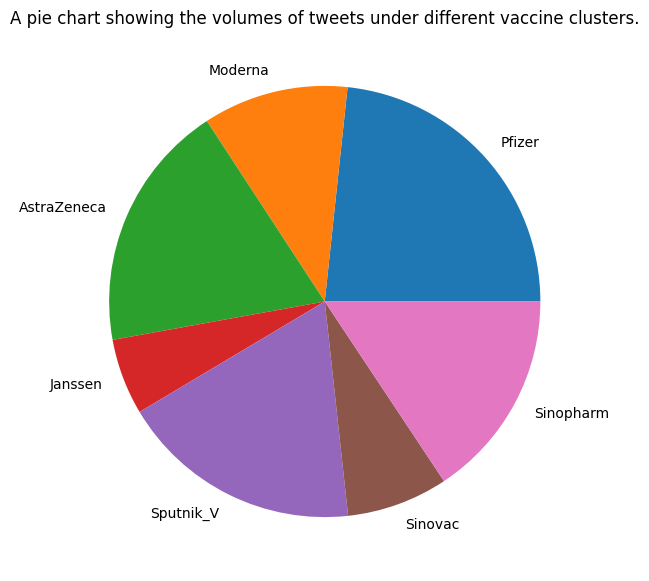

In [34]:
fig = plt.figure(figsize=(10, 7)) 
a = pivot_clusters.drop(['total'], axis=1)
plt.pie(a.loc['Total'], labels=a.columns)
plt.title('A pie chart showing the volumes of tweets under different vaccine clusters.')
plt.show() 

Text(0, 0.5, 'total tweets')

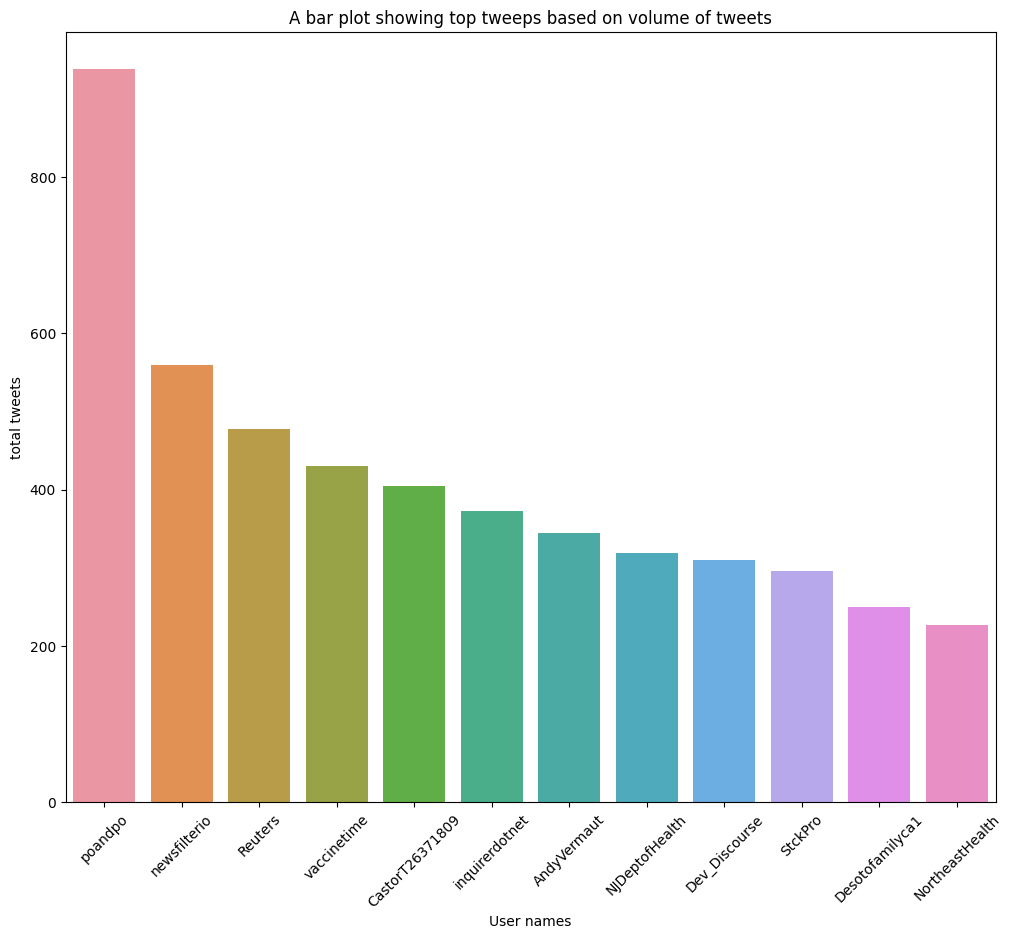

In [35]:
top_users = pivot_clusters.sort_values(by='total', ascending=False).iloc[2:14].reset_index()

plt.figure(figsize=(12,10))
sns.barplot(x='name', y='total', data=top_users)
plt.title('A bar plot showing top tweeps based on volume of tweets')
plt.xticks(rotation=45)
plt.xlabel('User names')
plt.ylabel('total tweets')

<ipython-input-36-7131b7cfe229>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e.drop(e.head(1).index, inplace=True)


Text(0, 0.5, 'Pfizer tweets')

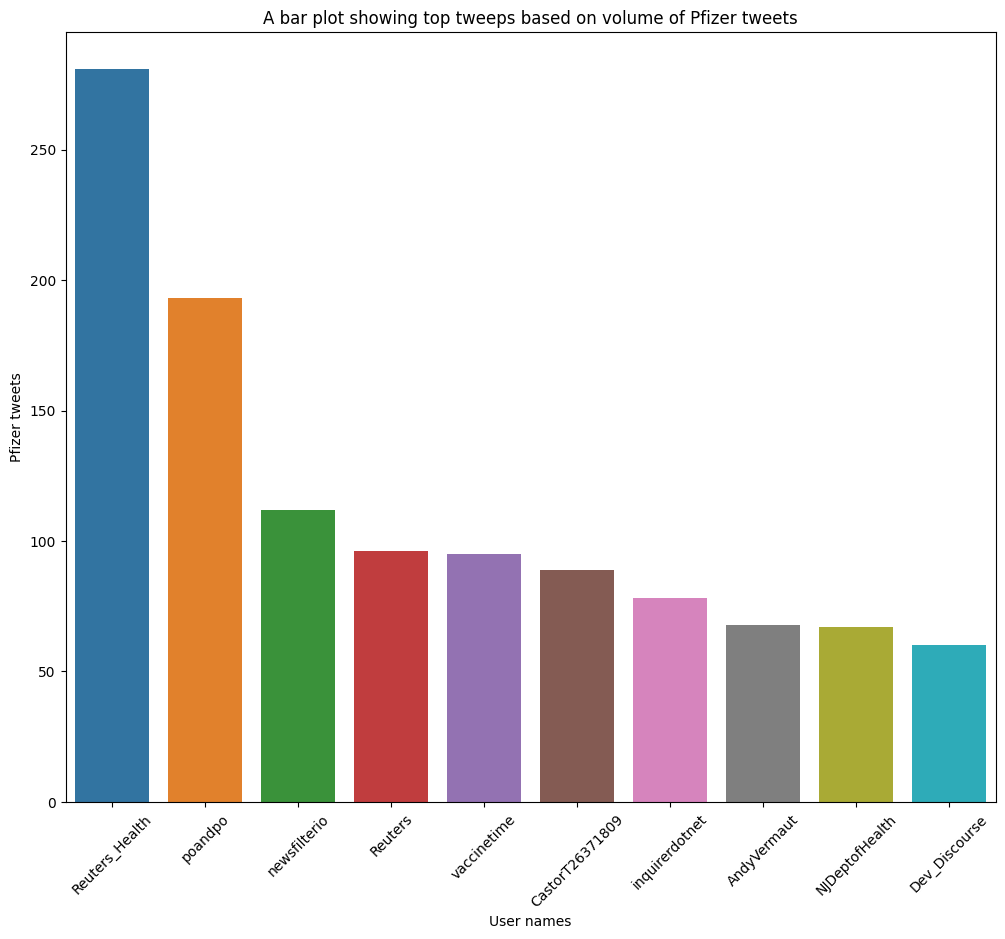

In [36]:
d = pivot_clusters.sort_values(by = 'Pfizer', ascending  = False)
e = d.head(11)
e.drop(e.head(1).index, inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.Pfizer)
plt.title('A bar plot showing top tweeps based on volume of Pfizer tweets')
plt.xticks(rotation=45)
plt.xlabel('User names')
plt.ylabel('Pfizer tweets')

<ipython-input-37-80ebffb33c4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e.drop(e.head(1).index, inplace=True)


Text(0, 0.5, 'Moderna tweets')

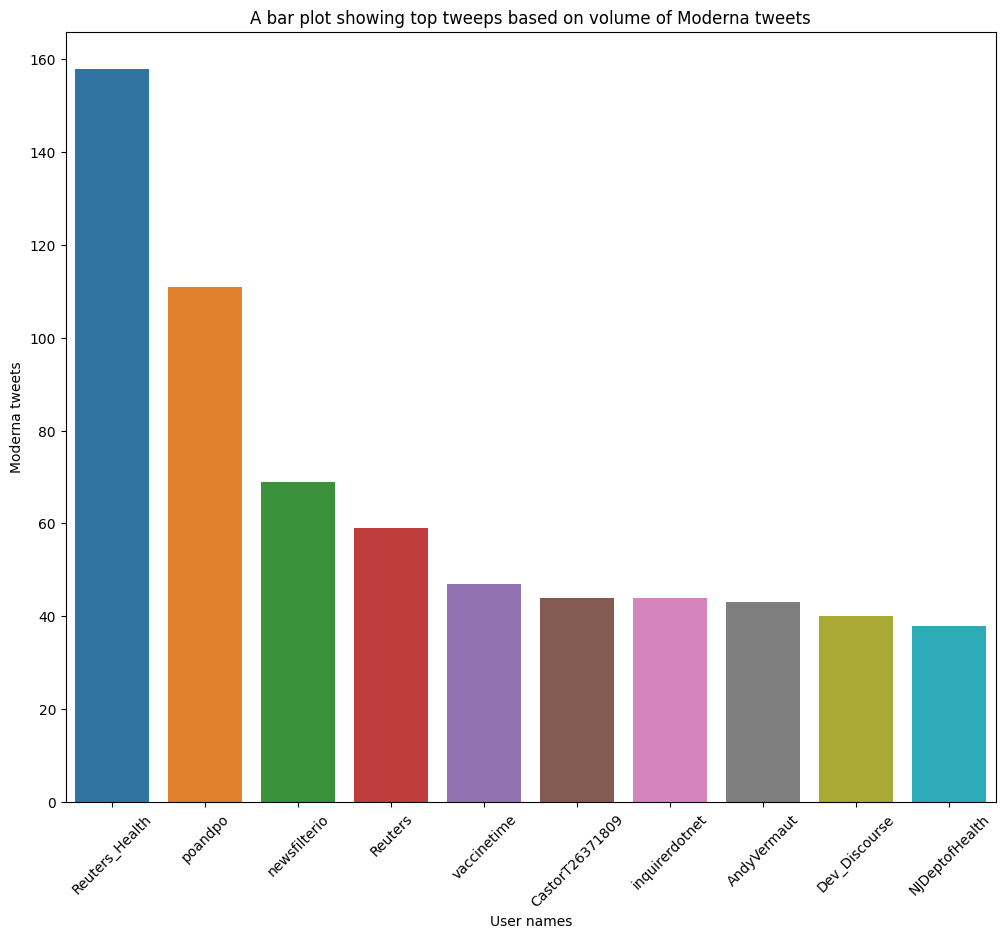

In [37]:
d = pivot_clusters.sort_values(by='Moderna', ascending=False)
e = d.head(11)
e.drop(e.head(1).index, inplace=True)

plt.figure(figsize=(12, 10))
sns.barplot(x=e.index, y=e.Moderna)
plt.title('A bar plot showing top tweeps based on volume of Moderna tweets')
plt.xticks(rotation=45)
plt.xlabel('User names')
plt.ylabel('Moderna tweets')

<ipython-input-38-1843f4bd0b54>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e.drop(e.head(1).index, inplace=True)


Text(0, 0.5, 'AstraZeneca tweets')

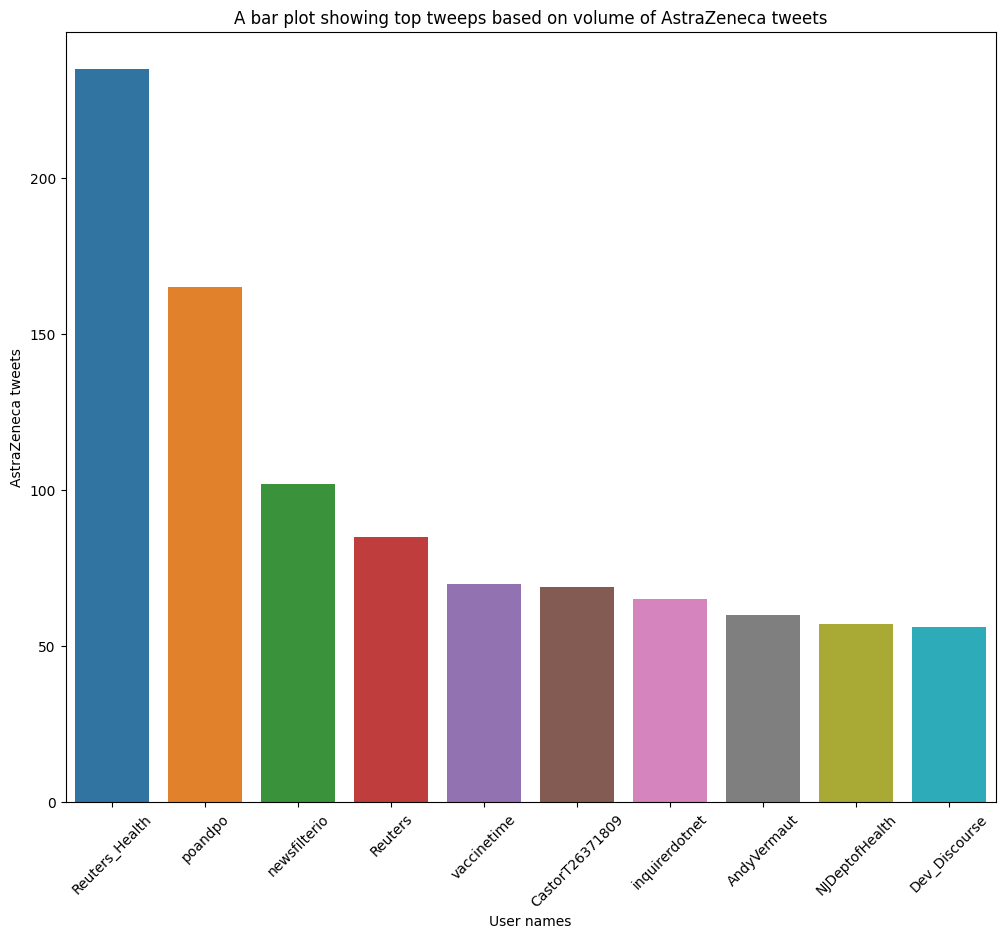

In [38]:
d = pivot_clusters.sort_values(by = 'AstraZeneca', ascending = False)
e = d.head(11)
e.drop(e.head(1).index, inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.AstraZeneca)
plt.title('A bar plot showing top tweeps based on volume of AstraZeneca tweets')
plt.xticks(rotation=45)
plt.xlabel('User names')
plt.ylabel('AstraZeneca tweets')

<ipython-input-39-9f51503877ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e.drop(e.head(1).index, inplace=True)


Text(0, 0.5, 'Janssen tweets')

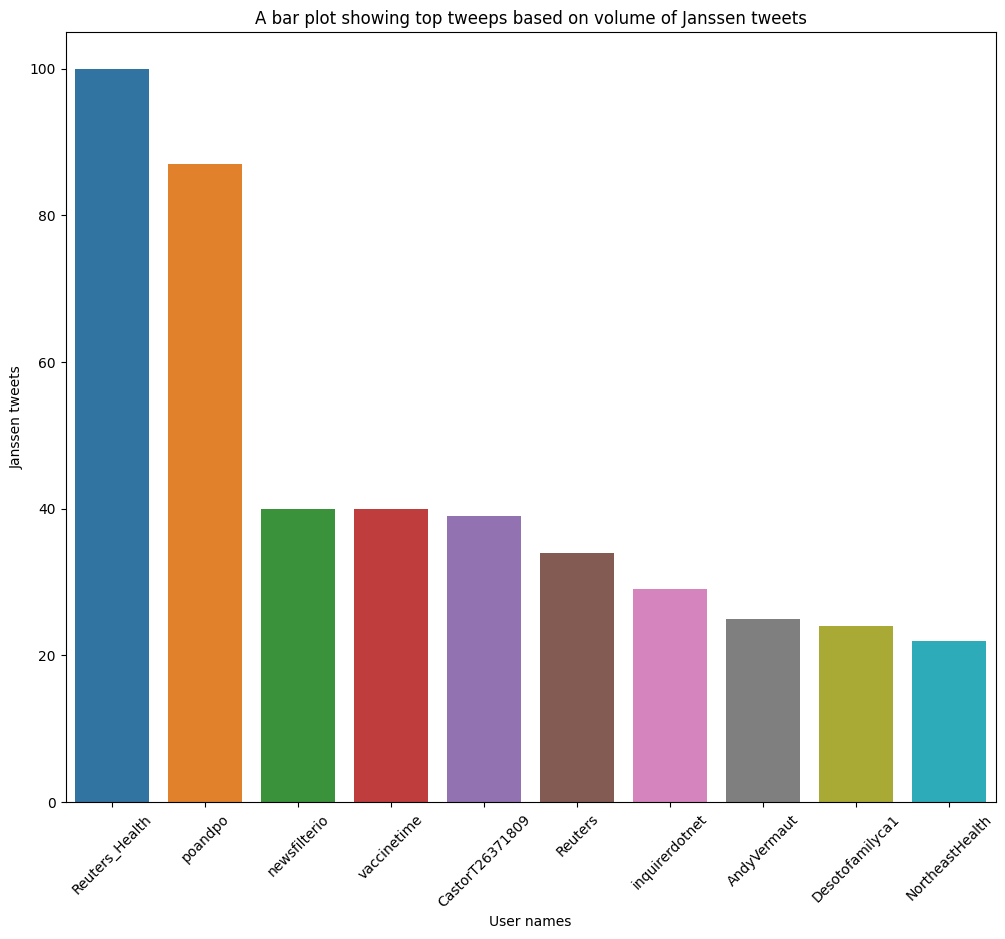

In [39]:
d = pivot_clusters.sort_values(by='Janssen', ascending=False)
e = d.head(11)
e.drop(e.head(1).index, inplace=True)

plt.figure(figsize=(12, 10))
sns.barplot(x=e.index, y=e.Janssen)
plt.title('A bar plot showing top tweeps based on volume of Janssen tweets')
plt.xticks(rotation=45)
plt.xlabel('User names')
plt.ylabel('Janssen tweets')


<ipython-input-40-b7676dea585d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e.drop(e.head(1).index, inplace=True)


Text(0, 0.5, 'Sputnik_V tweets')

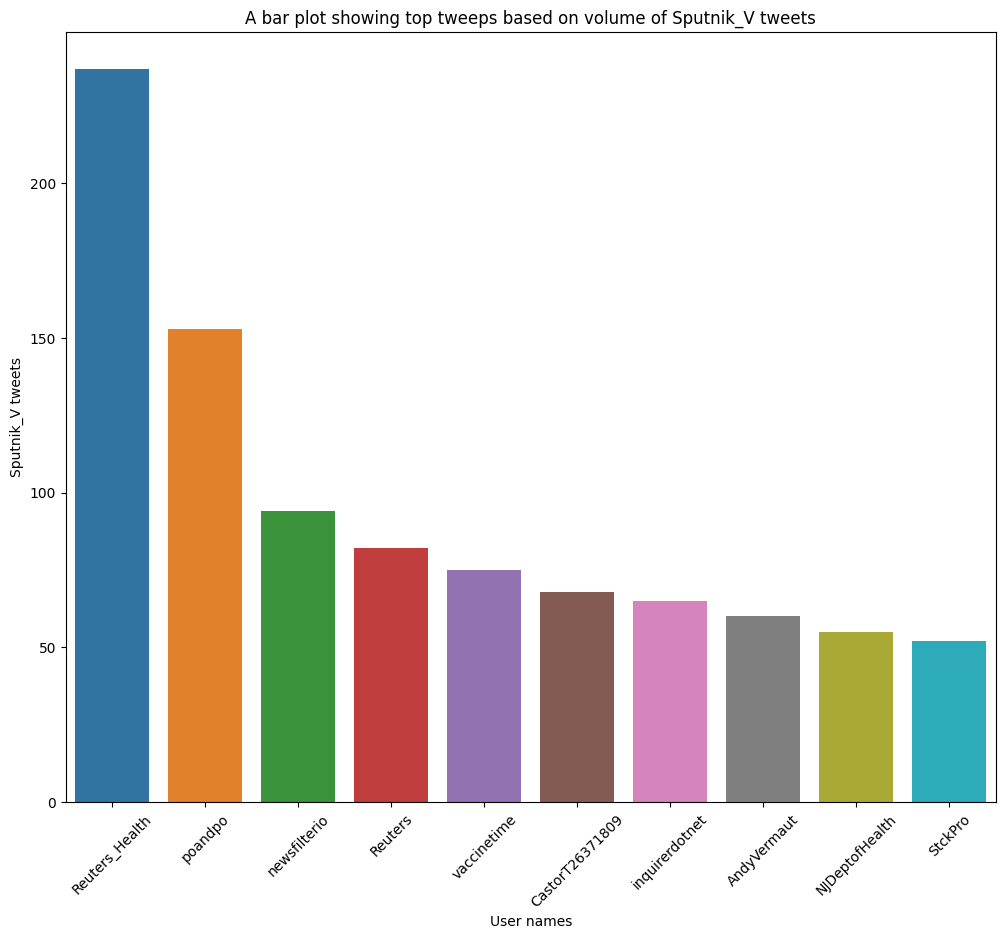

In [40]:
d = pivot_clusters.sort_values(by='Sputnik_V', ascending=False)
e = d.head(11)
e.drop(e.head(1).index, inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(x=e.index, y=e.Sputnik_V)
plt.title('A bar plot showing top tweeps based on volume of Sputnik_V tweets')
plt.xticks(rotation=45)
plt.xlabel('User names')
plt.ylabel('Sputnik_V tweets')


<ipython-input-41-2bad8dba6b0c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e.drop(e.head(1).index, inplace=True)


Text(0, 0.5, 'Sinovac tweets')

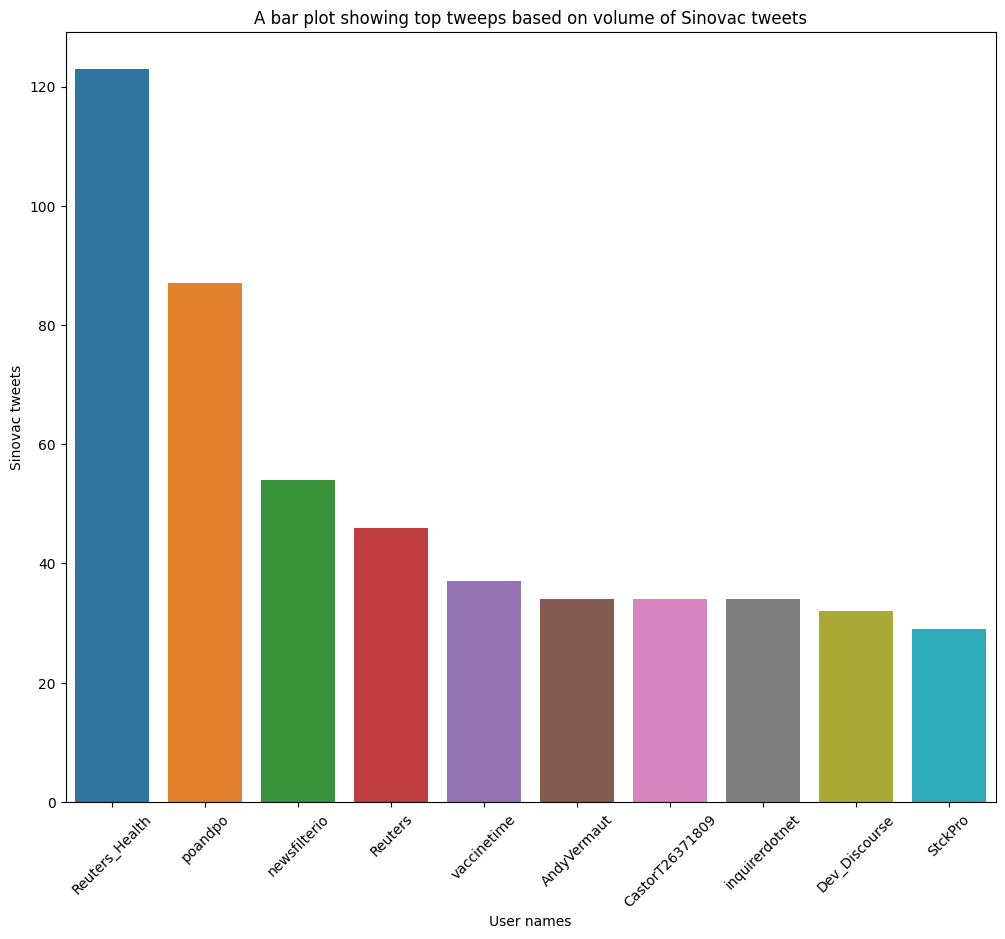

In [41]:
d = pivot_clusters.sort_values(by='Sinovac', ascending=False)
e = d.head(11)
e.drop(e.head(1).index, inplace=True)

plt.figure(figsize=(12, 10))
sns.barplot(x=e.index, y=e.Sinovac)
plt.title('A bar plot showing top tweeps based on volume of Sinovac tweets')
plt.xticks(rotation=45)
plt.xlabel('User names')
plt.ylabel('Sinovac tweets')


<ipython-input-42-dafe832bf10d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e.drop(e.head(1).index, inplace=True)


Text(0, 0.5, 'Sinopharm tweets')

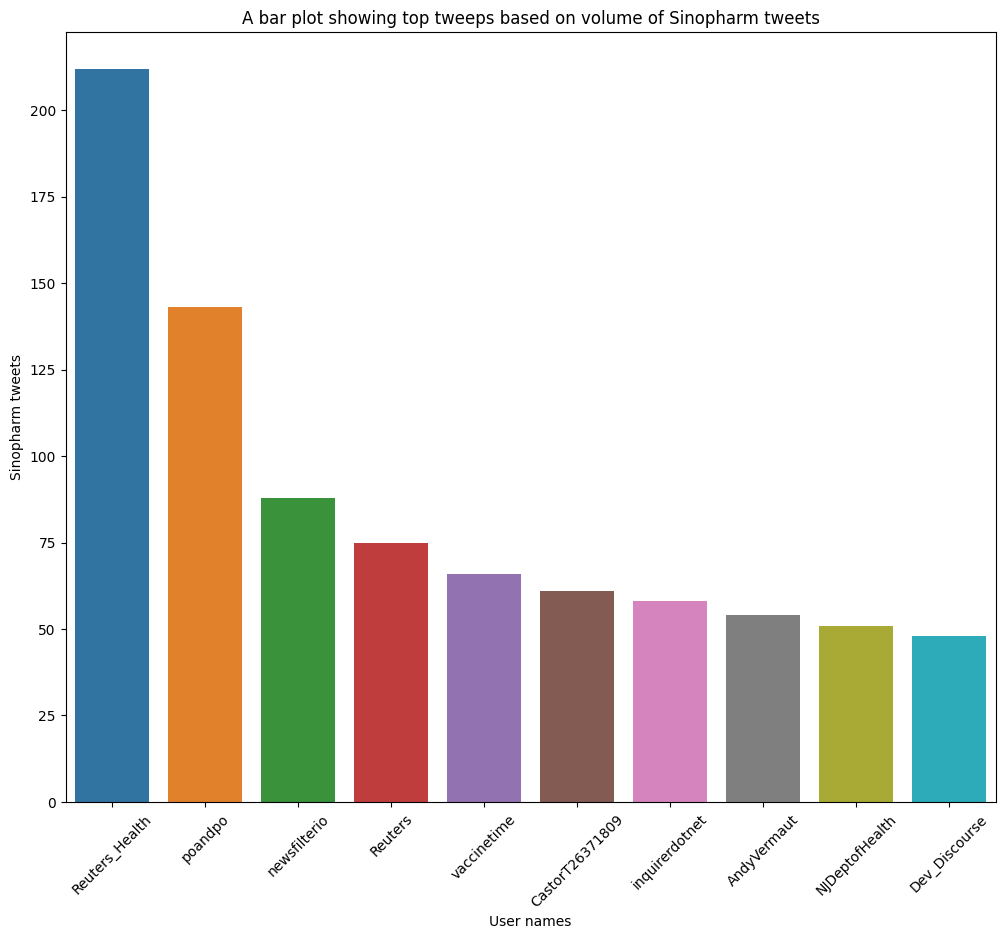

In [42]:
d = pivot_clusters.sort_values(by='Sinopharm', ascending=False)
e = d.head(11)
e.drop(e.head(1).index, inplace=True)

plt.figure(figsize=(12, 10))
sns.barplot(x=e.index, y=e.Sinopharm)
plt.title('A bar plot showing top tweeps based on volume of Sinopharm tweets')
plt.xticks(rotation=45)
plt.xlabel('User names')
plt.ylabel('Sinopharm tweets')


(83218, 8)
(83217, 8)


<ipython-input-43-6009730ea873>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pivot_clusters.Pfizer, fit=norm);



 mu = 0.22 and sigma = 1.94



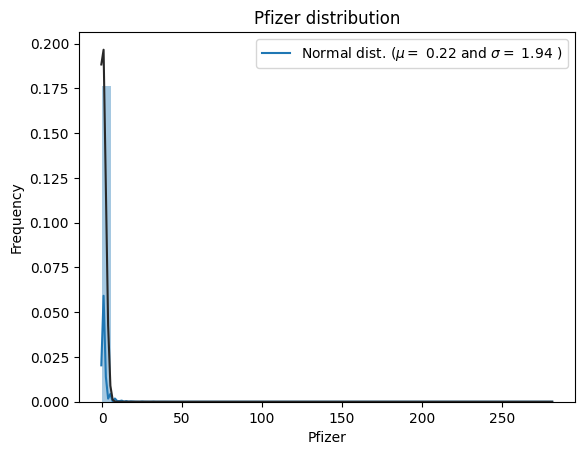

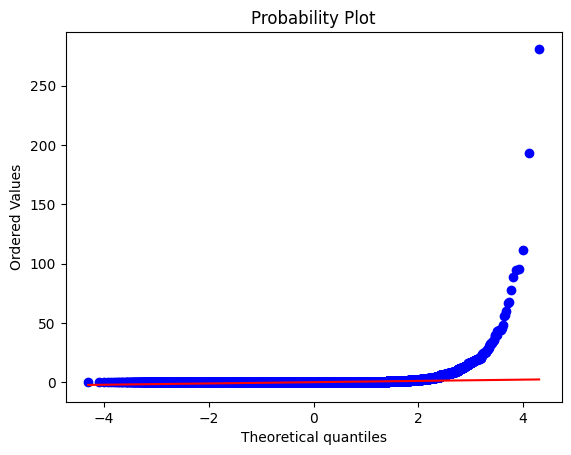

In [43]:
from statistics import mean
import re
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import StandardScaler

# drop the totals row.
print(pivot_clusters.shape)
pivot_clusters.drop(pivot_clusters.tail(1).index, inplace=True)
print(pivot_clusters.shape)

# Target variable
sns.distplot(pivot_clusters.Pfizer, fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(pivot_clusters.Pfizer)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Now plot the distribution
plt.title('Pfizer tweets distribution plot')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Pfizer distribution')

# Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(pivot_clusters.Pfizer, plot=plt)
plt.show()


<ipython-input-44-cef07ba6a02a>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pivot_clusters[vaccine] , fit=norm)



 mu = 0.22 and sigma = 1.94



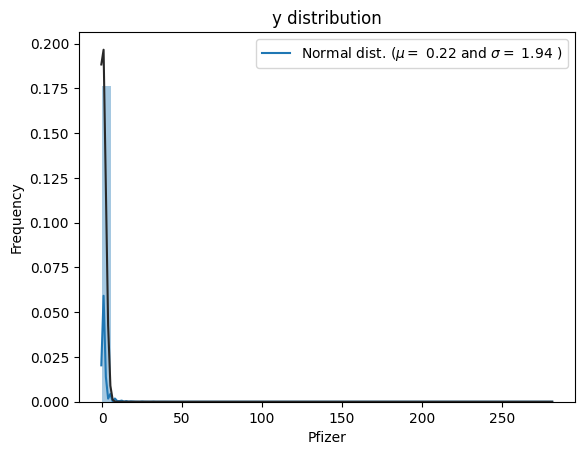

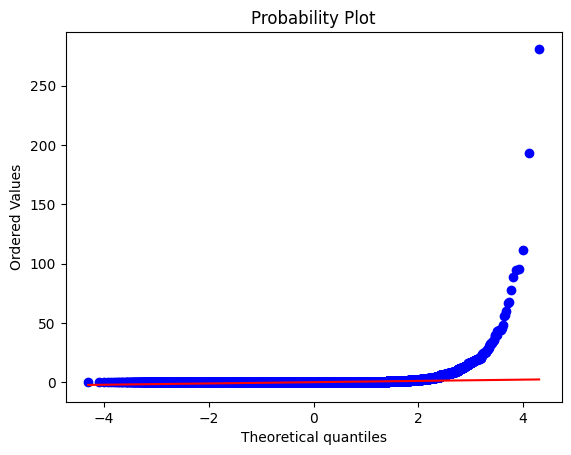

<ipython-input-44-cef07ba6a02a>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pivot_clusters[vaccine] , fit=norm)



 mu = 0.10 and sigma = 1.10



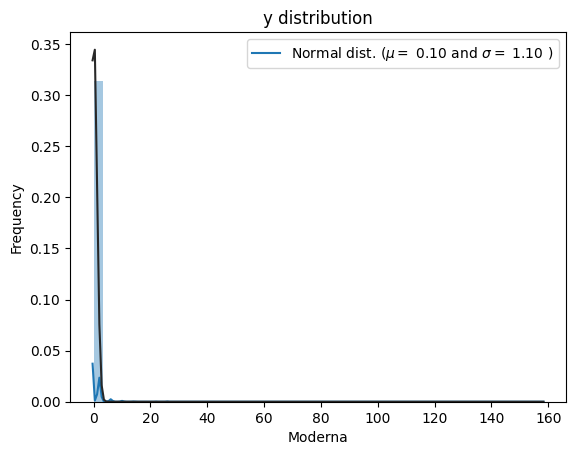

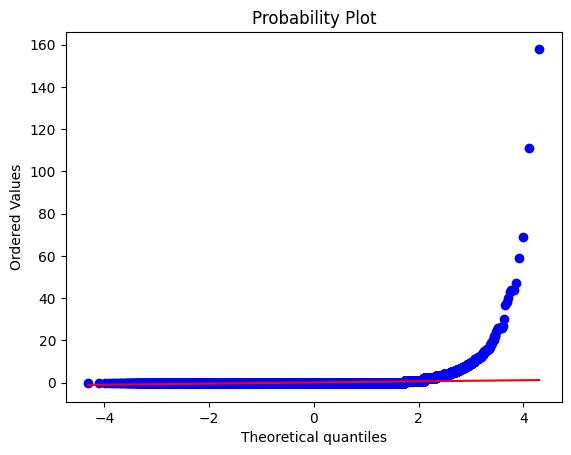

<ipython-input-44-cef07ba6a02a>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pivot_clusters[vaccine] , fit=norm)



 mu = 0.18 and sigma = 1.64



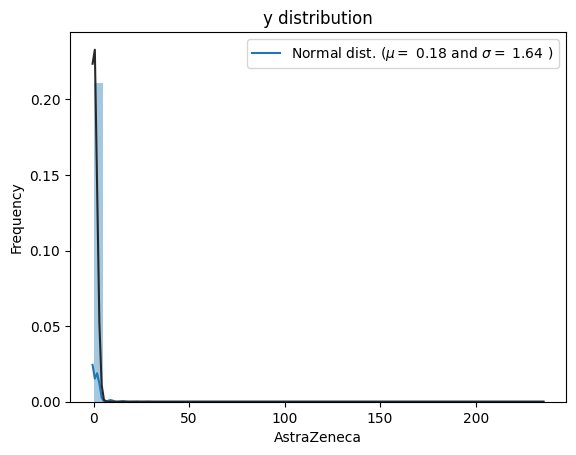

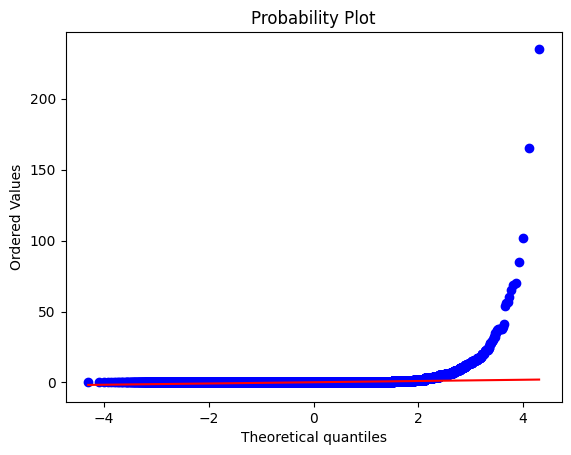

<ipython-input-44-cef07ba6a02a>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pivot_clusters[vaccine] , fit=norm)



 mu = 0.05 and sigma = 0.72



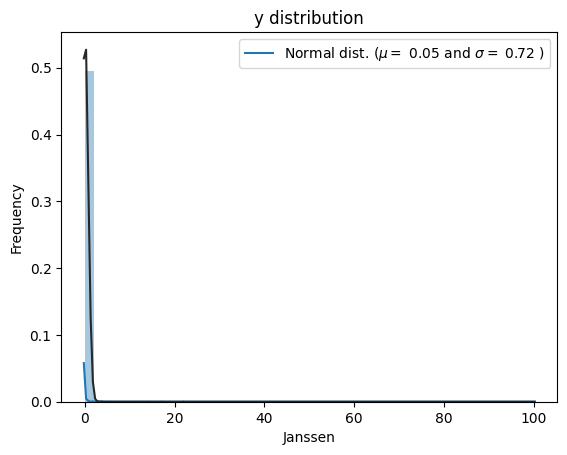

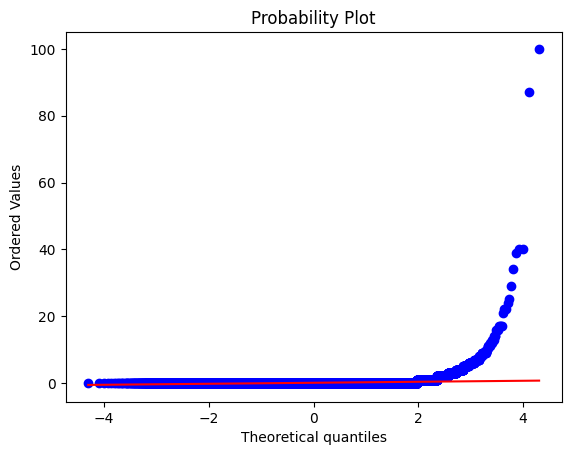

<ipython-input-44-cef07ba6a02a>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pivot_clusters[vaccine] , fit=norm)



 mu = 0.17 and sigma = 1.60



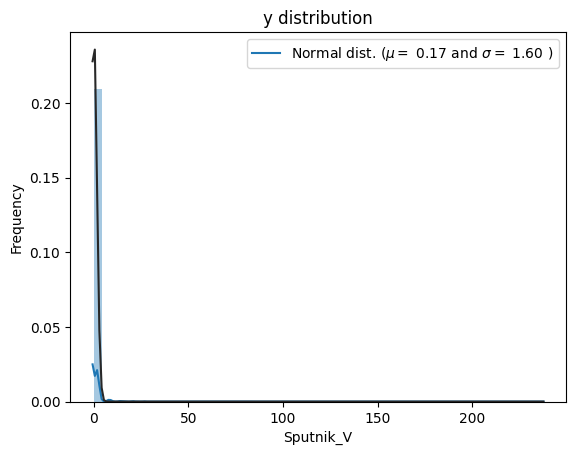

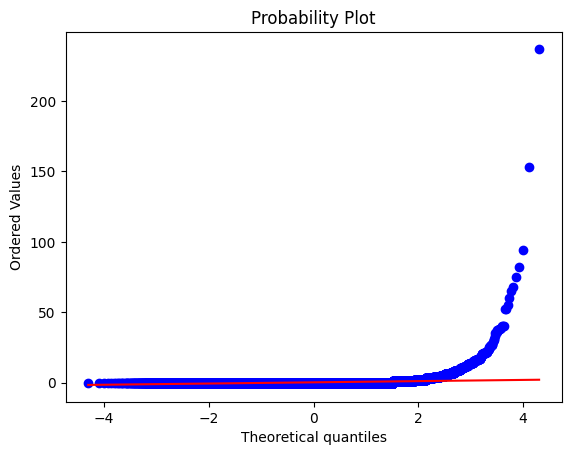

<ipython-input-44-cef07ba6a02a>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pivot_clusters[vaccine] , fit=norm)



 mu = 0.07 and sigma = 0.85



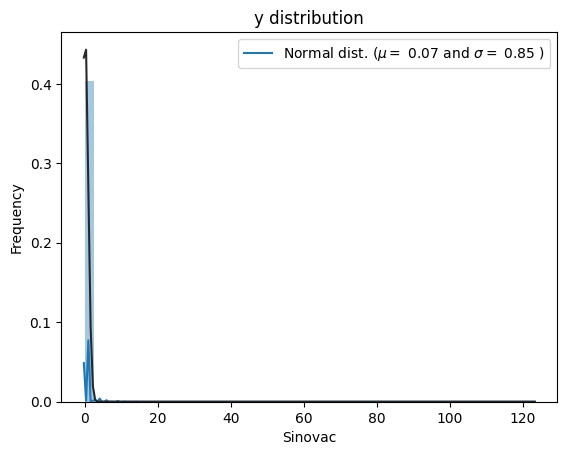

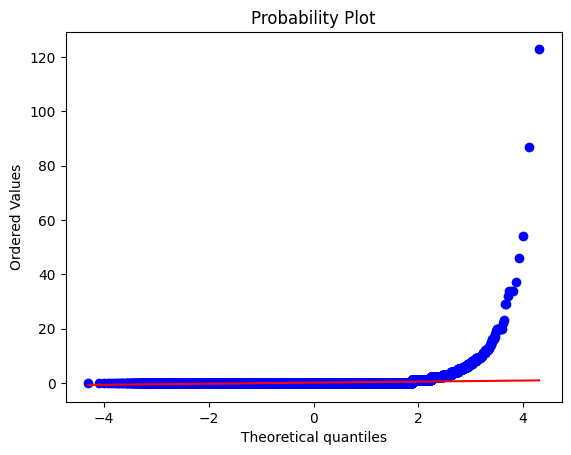

<ipython-input-44-cef07ba6a02a>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pivot_clusters[vaccine] , fit=norm)



 mu = 0.15 and sigma = 1.45



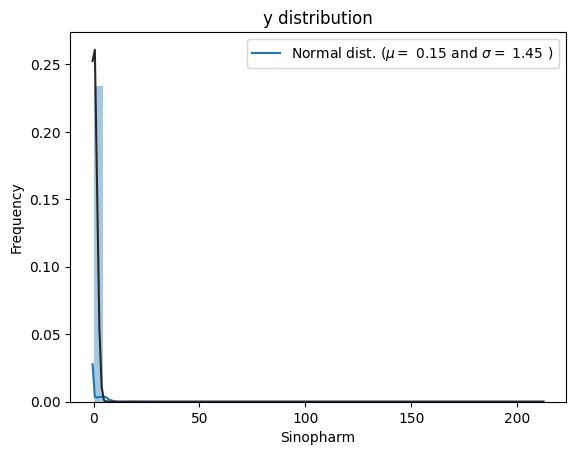

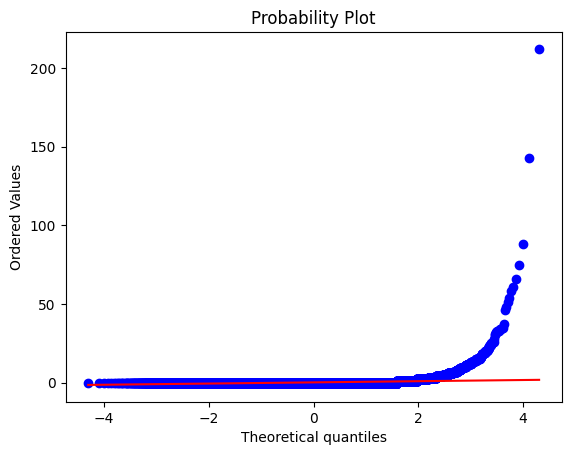

In [44]:
from statistics import mean
import re
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import StandardScaler


def plot_dist_qq(vaccine):
    # Target variable
    sns.distplot(pivot_clusters[vaccine] , fit=norm)

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(pivot_clusters[vaccine])
    print(f'\n mu = {mu:.2f} and sigma = {sigma:.2f}\n')

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.title(f'{vaccine} tweets distribution plot')
    plt.ylabel('Frequency')
    plt.title('y distribution')

    #Get also the QQ-plot
    fig = plt.figure()
    res = stats.probplot(pivot_clusters[vaccine], plot=plt)
    plt.show()


vaccines = ['Pfizer', 'Moderna', 'AstraZeneca', 'Janssen', 'Sputnik_V', 'Sinovac', 'Sinopharm']

for vaccine in vaccines:
    plot_dist_qq(vaccine)

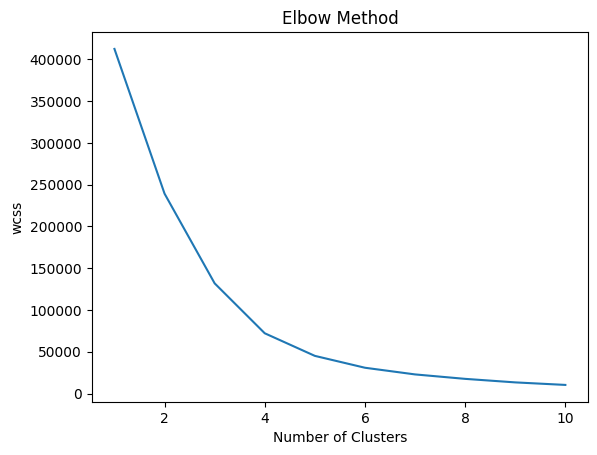

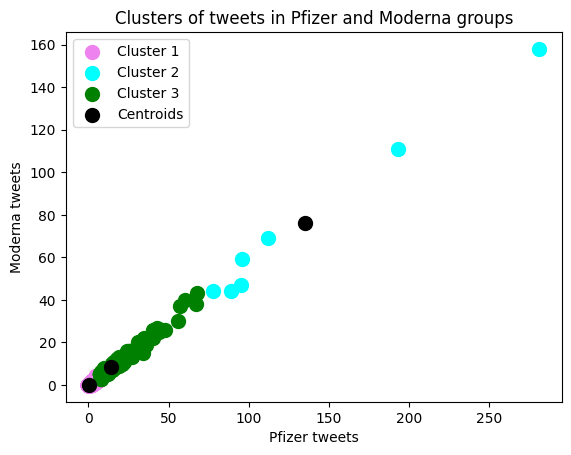

In [45]:
# X = pivot_clusters.iloc[:, [0,1]].values
X = pivot_clusters[['Pfizer', 'Moderna']].values

# Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

# fitting kmeans to dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
# plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in Pfizer and Moderna groups')
plt.xlabel('Pfizer tweets')
plt.ylabel('Moderna tweets')
plt.legend()
plt.show()


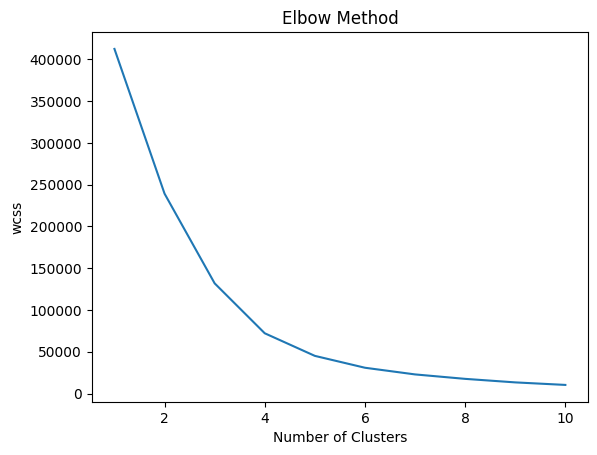

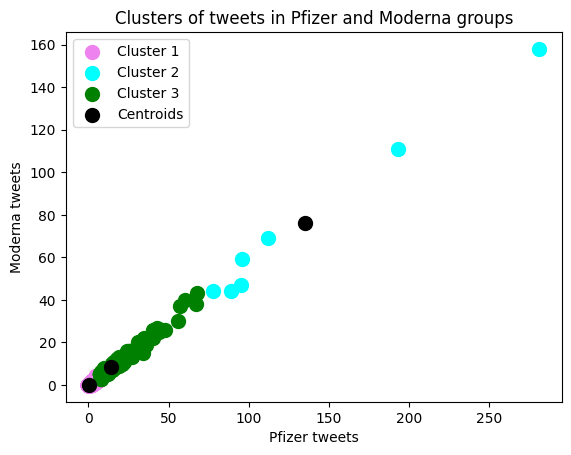

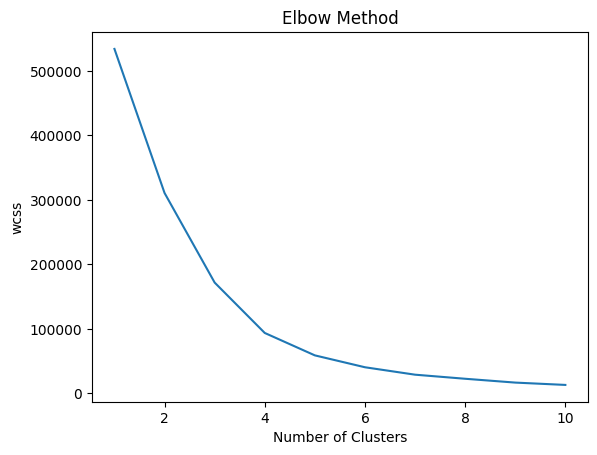

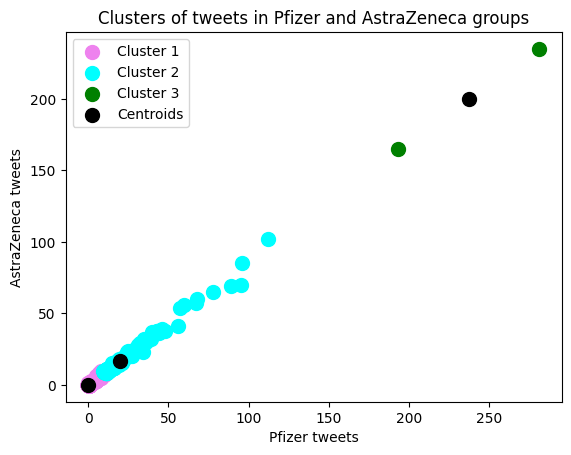

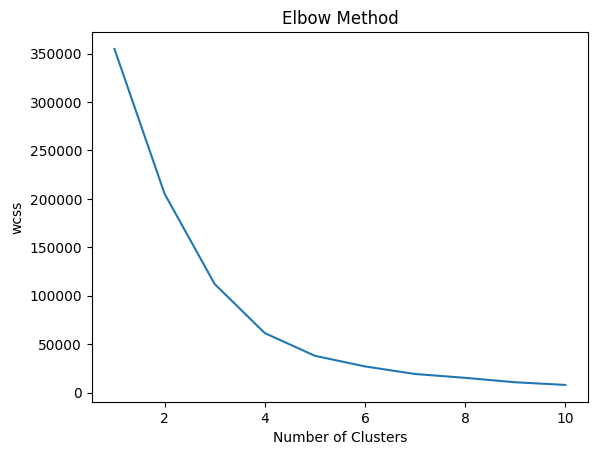

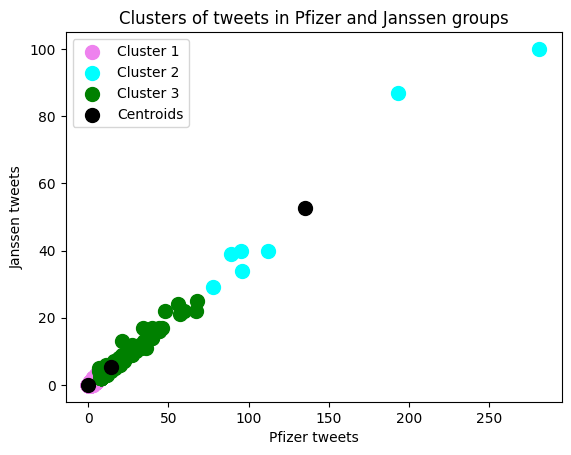

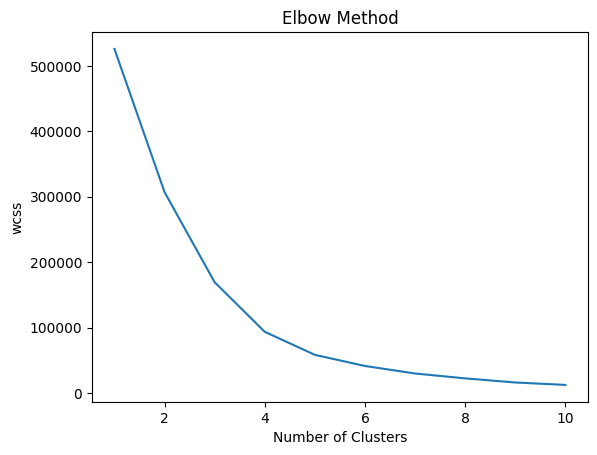

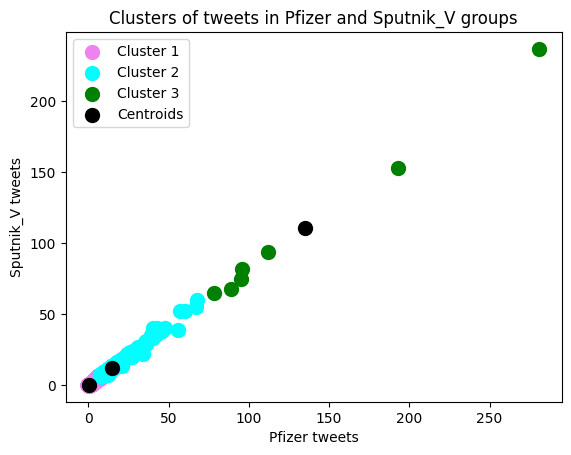

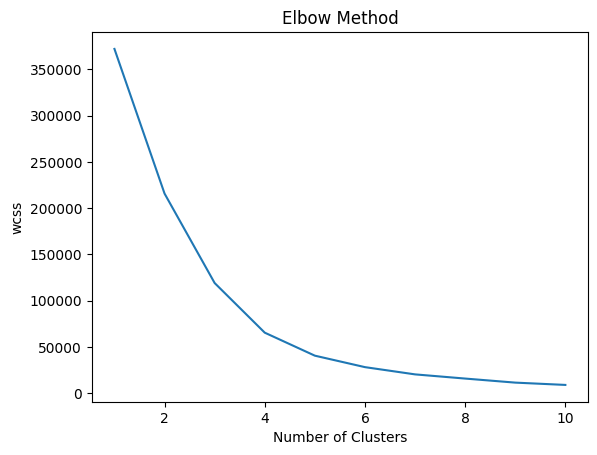

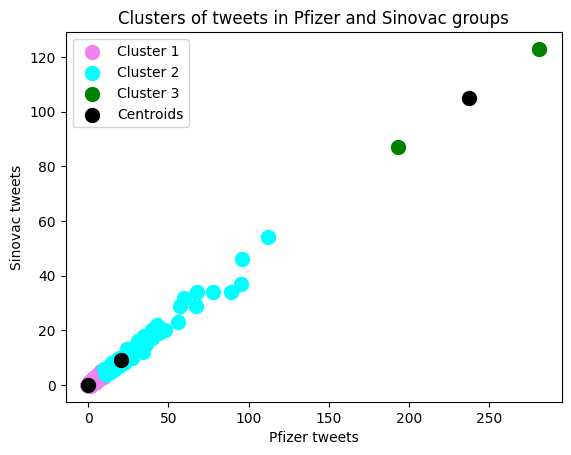

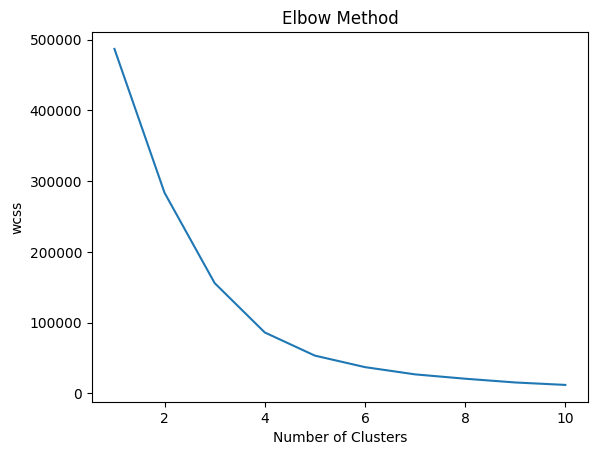

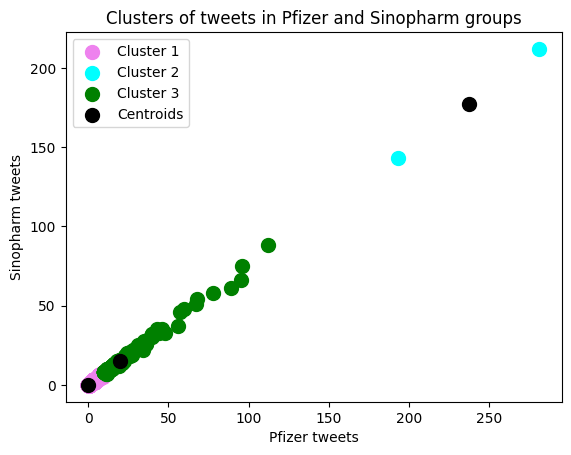

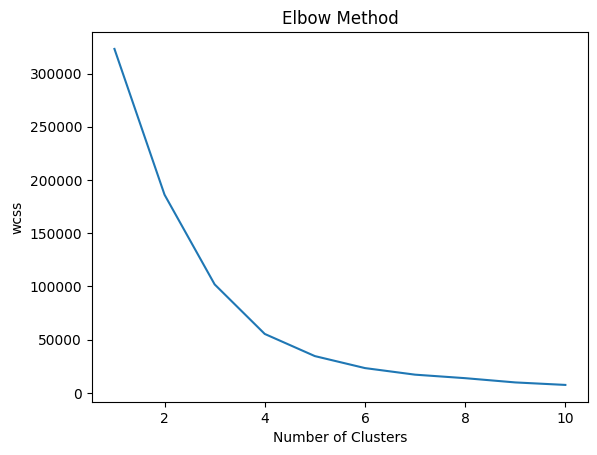

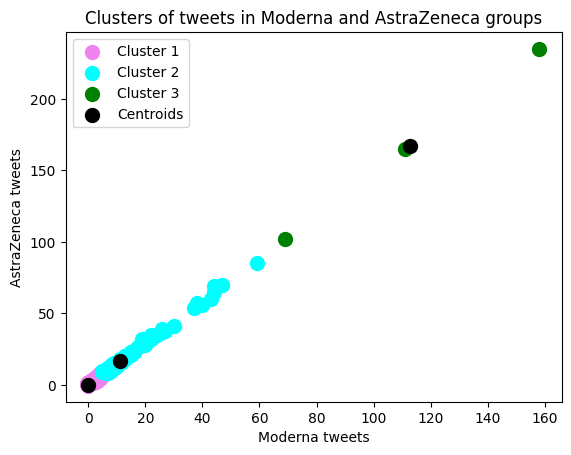

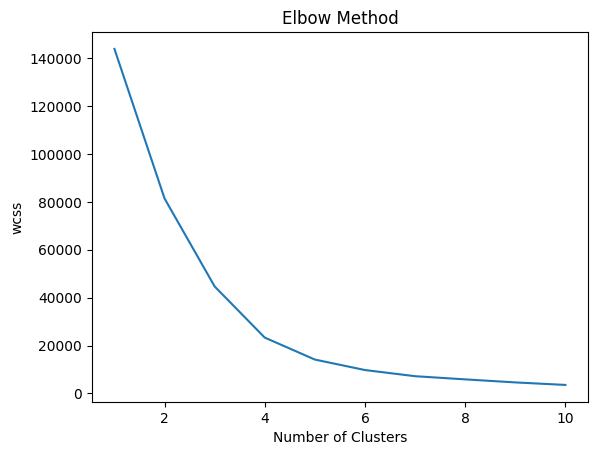

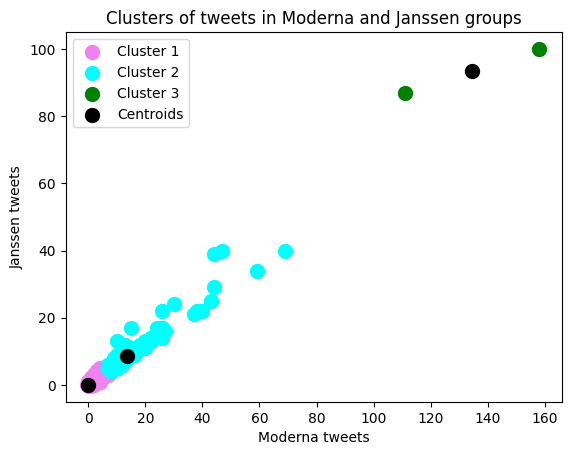

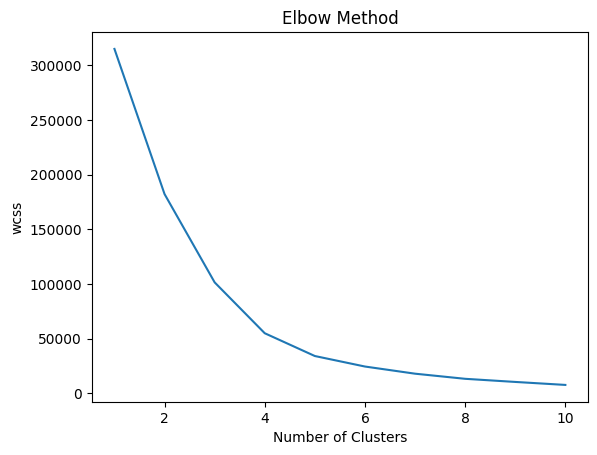

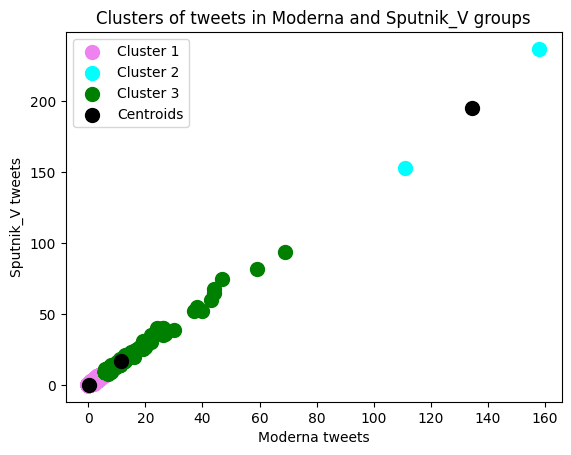

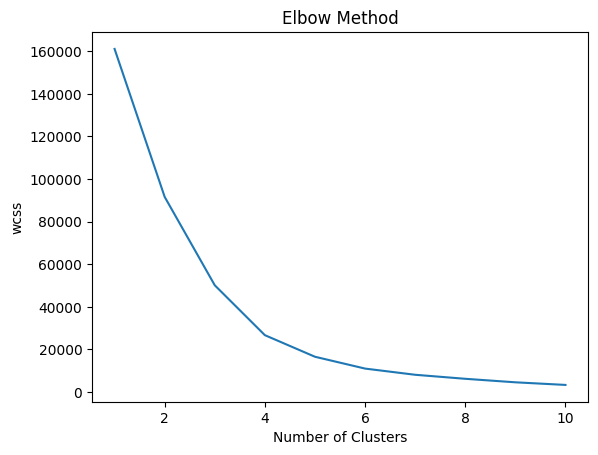

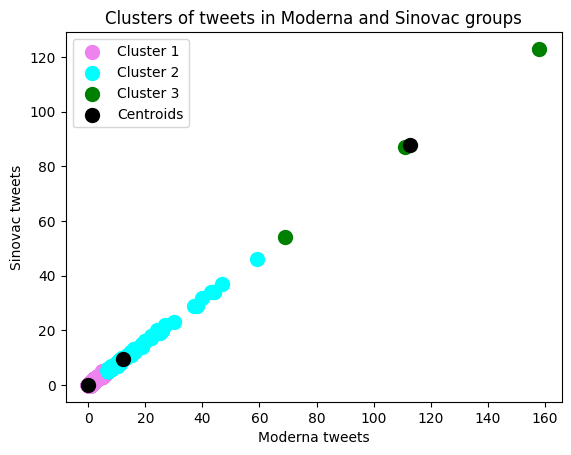

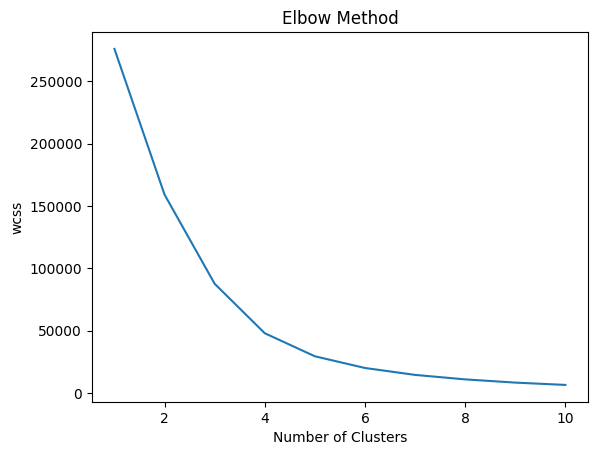

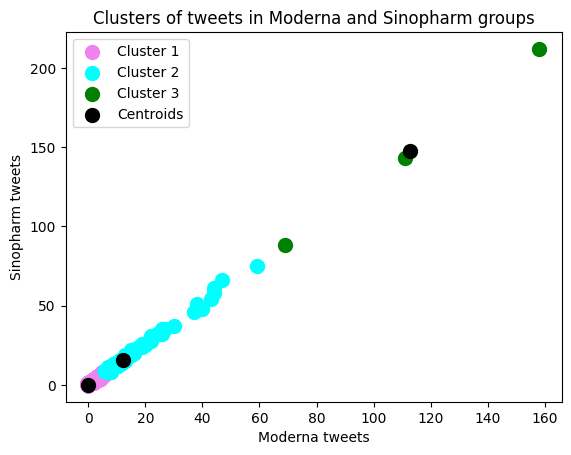

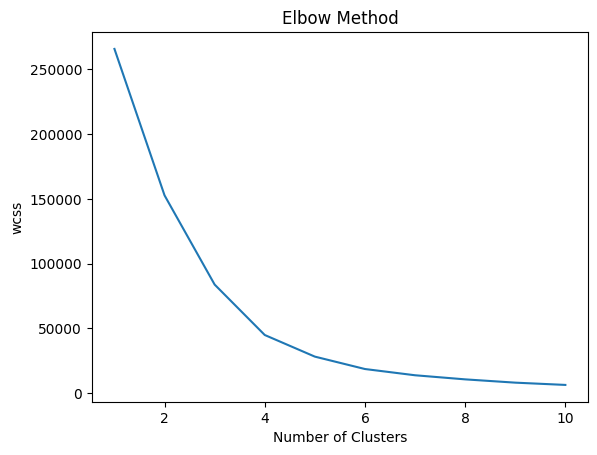

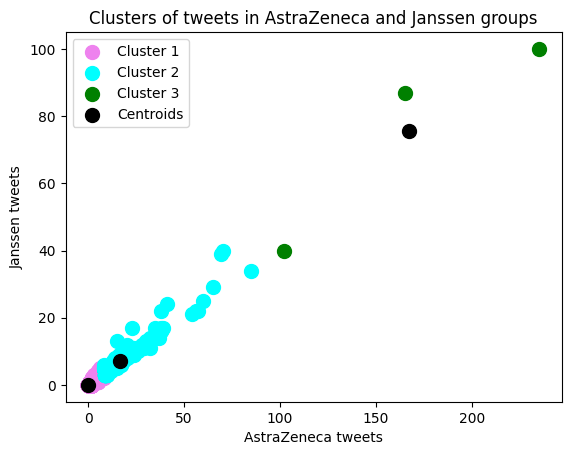

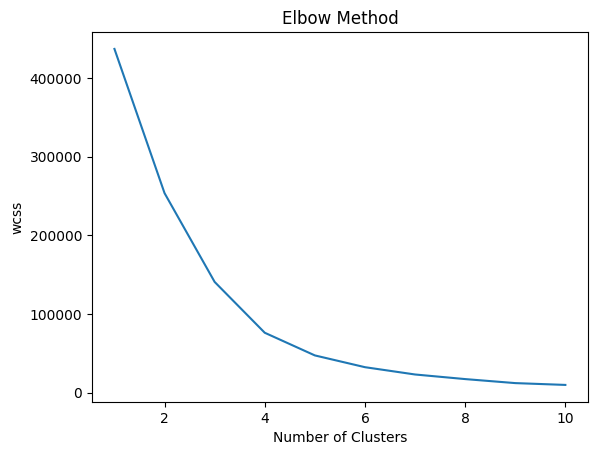

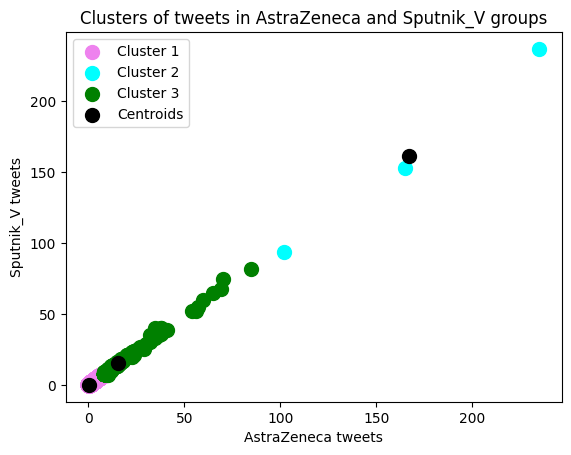

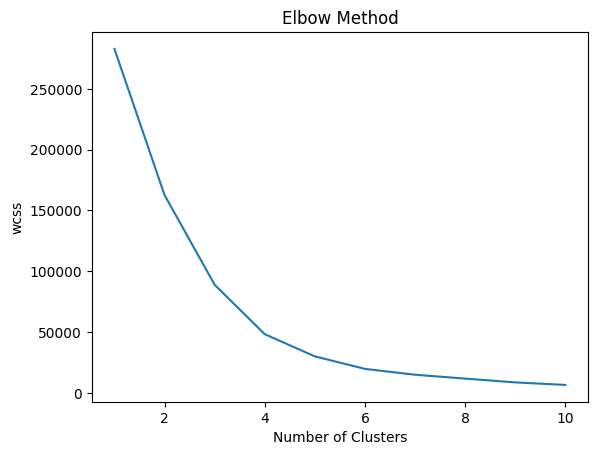

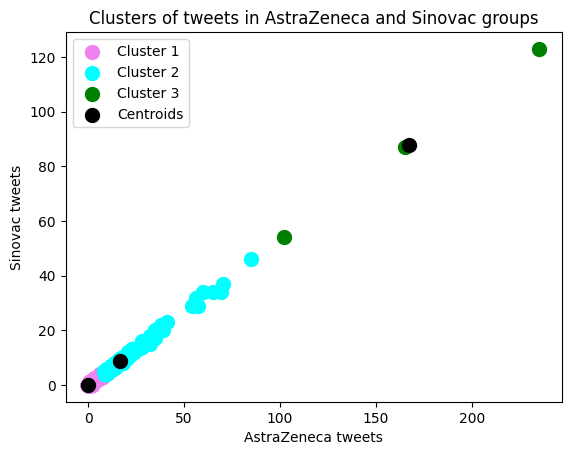

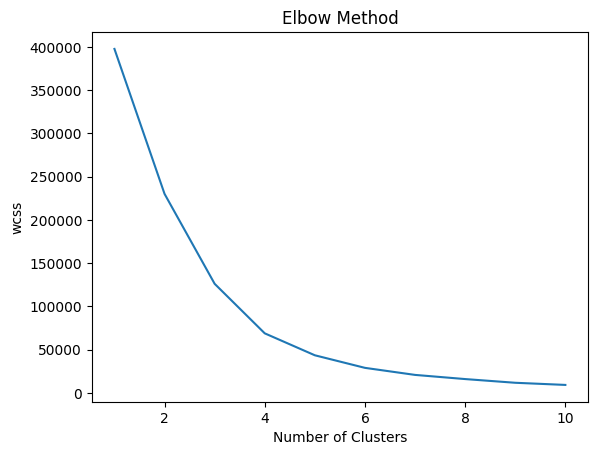

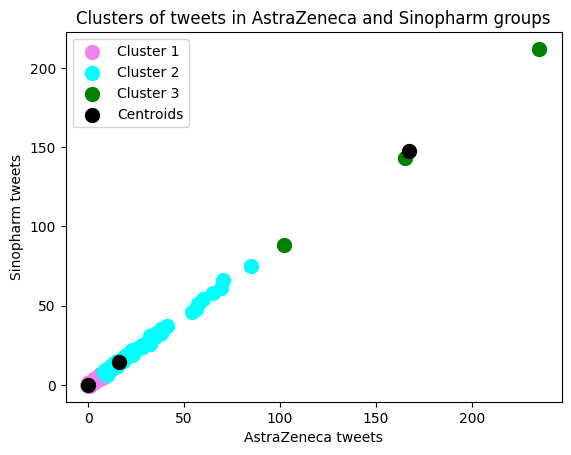

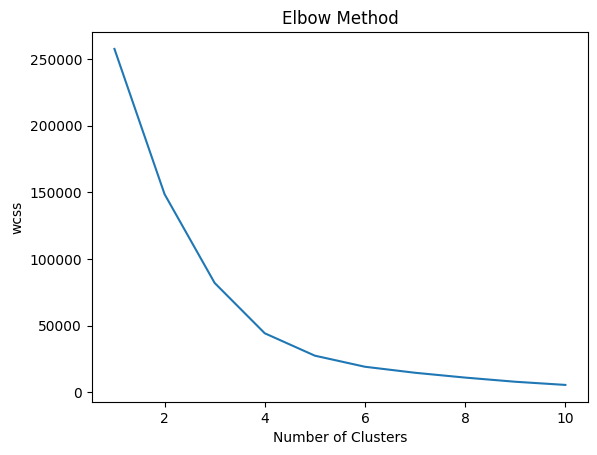

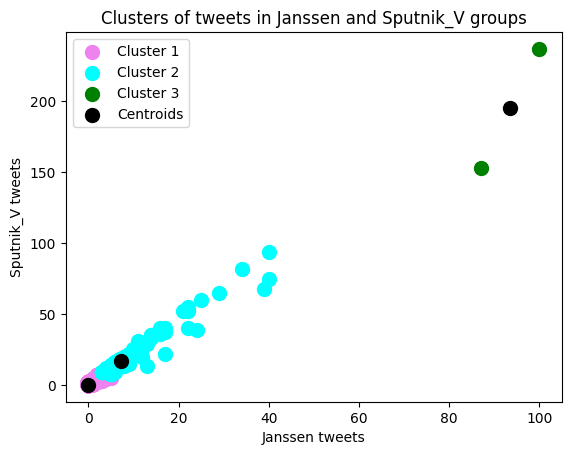

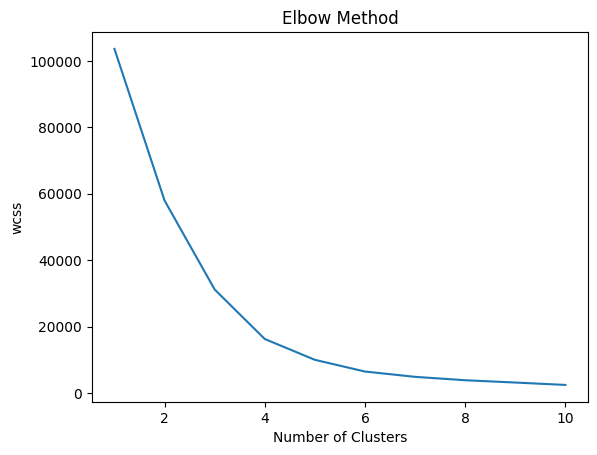

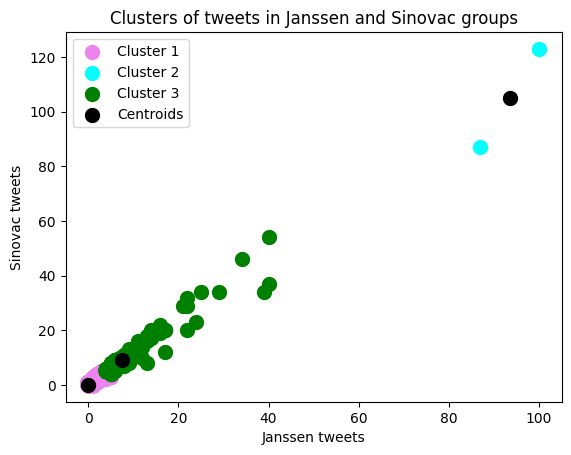

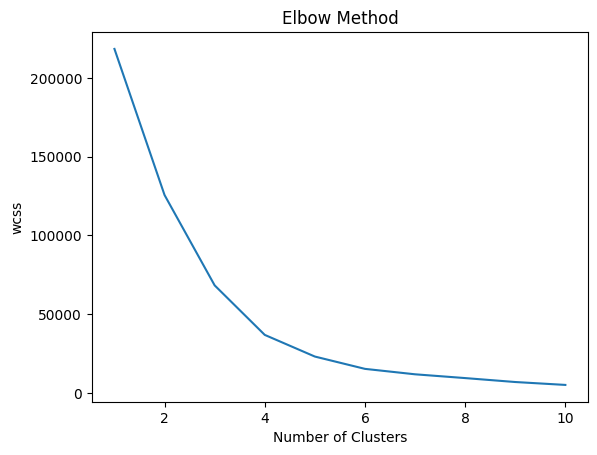

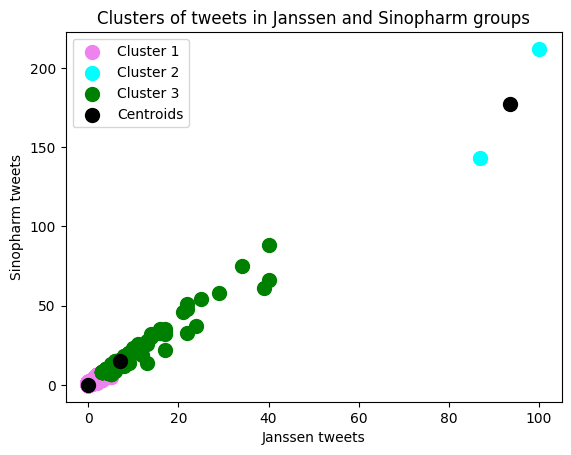

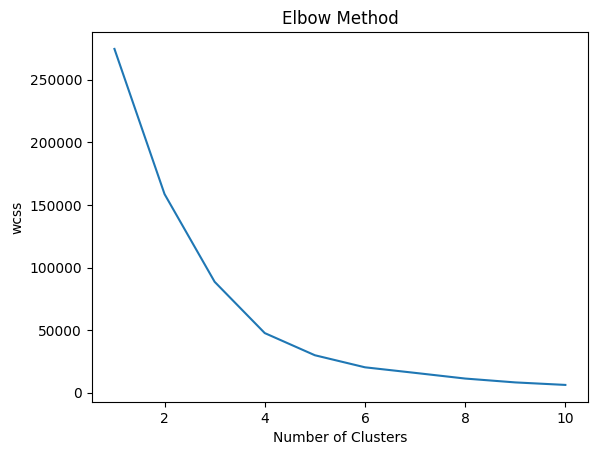

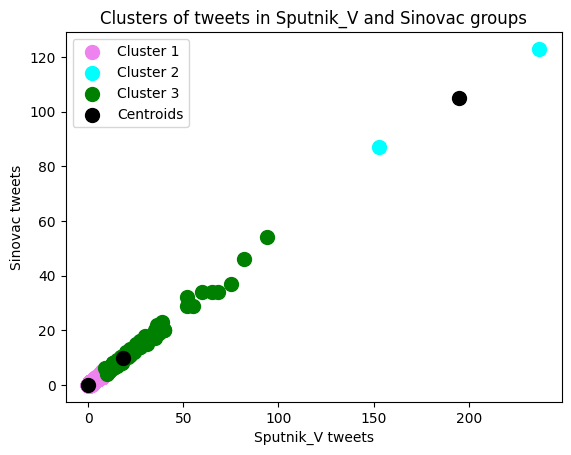

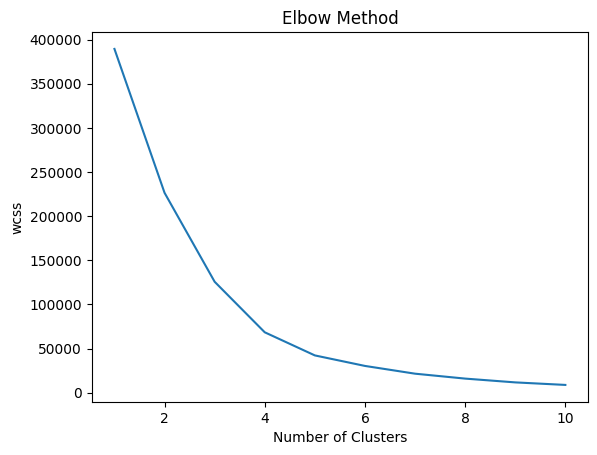

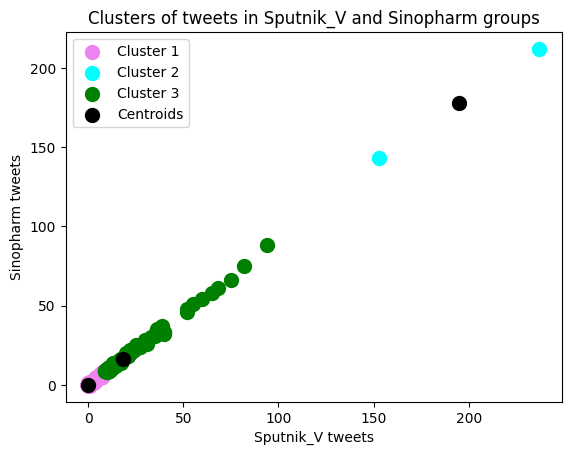

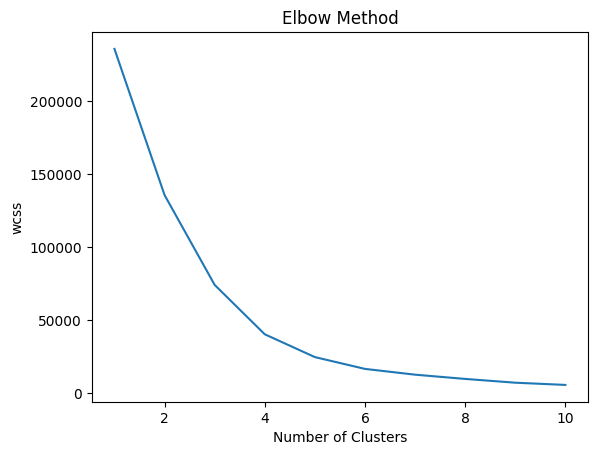

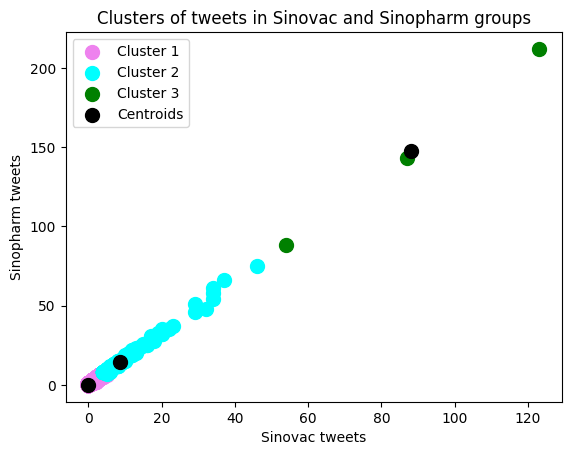

In [46]:
from itertools import combinations

# Define the vaccines to cluster
vaccines = ['Pfizer', 'Moderna', 'AstraZeneca', 'Janssen', 'Sputnik_V', 'Sinovac', 'Sinopharm']

# Iterate over all pairs of vaccines
for vac1, vac2 in combinations(vaccines, 2):
    # Get the data for the pair of vaccines
    X = pivot_clusters[[vac1, vac2]].values
    
    # Elbow Method
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt

    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1,11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('wcss')
    plt.show()

    # fitting kmeans to dataset
    kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
    Y_kmeans = kmeans.fit_predict(X)

    # Visualising the clusters
    plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
    plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
    plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
    # plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
    # plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
    plt.title('Clusters of tweets in {} and {} groups'.format(vac1, vac2))
    plt.xlabel('{} tweets'.format(vac1))
    plt.ylabel('{} tweets'.format(vac2))
    plt.legend()
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Clusters by PCA')

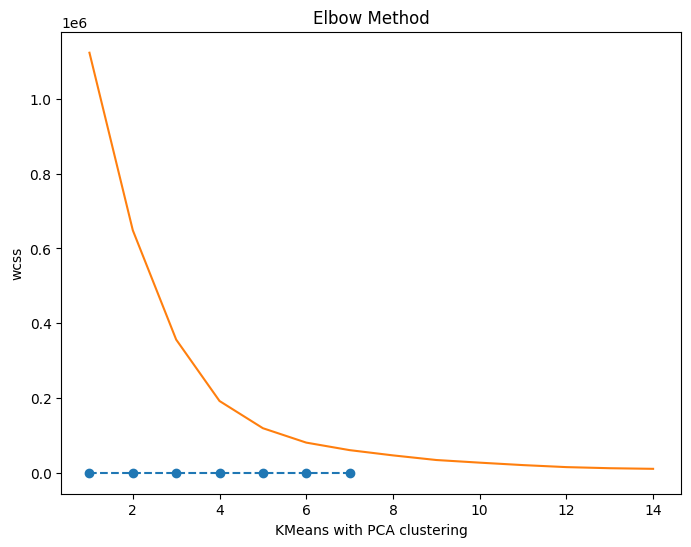

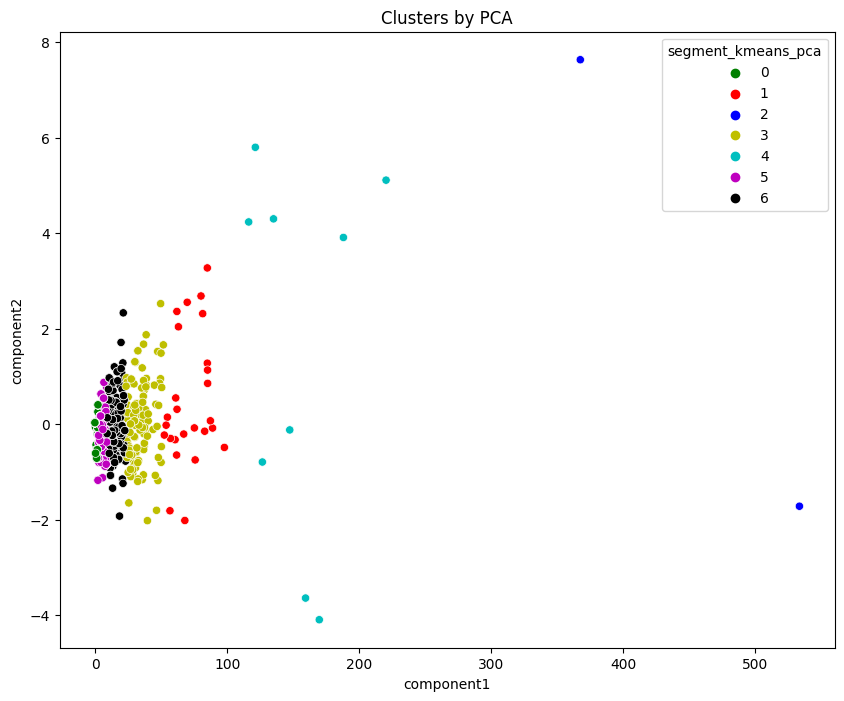

In [47]:
from sklearn.decomposition import PCA

seg = pivot_clusters[['Pfizer', 'Moderna', 'AstraZeneca', 'Janssen', 'Sputnik_V', 'Sinovac', 'Sinopharm']].copy()

pca = PCA()
pca.fit(seg)
pca.explained_variance_ratio_

plt.figure(figsize = (8,6))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.xlabel('components')
plt.ylabel('cummulative explained variance')

pca = PCA(n_components = 2)
pca.fit(seg)
scores = pca.transform(seg)

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(scores)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss)
plt.title('Elbow Method')
plt.xlabel('KMeans with PCA clustering')
plt.ylabel('wcss')

n = 7
kmeans_pca = KMeans(n_clusters = n, init = 'k-means++', random_state = 0)
kmeans_pca.fit(scores)

c = pd.concat([seg.reset_index(drop = True), pd.DataFrame(scores)], axis = 1)
c.columns.values[-2:] = ['component1', 'component2']
c['segment_kmeans_pca'] = kmeans_pca.labels_

c.tail()

plt.figure(figsize = (10,8))
sns.scatterplot(x = c['component1'], y = c['component2'], hue = c['segment_kmeans_pca'], palette = ['g', 'r', 'b', 'y', 'c', 'm', 'k'])
plt.title('Clusters by PCA')


Text(0, 0.5, 'wcss')

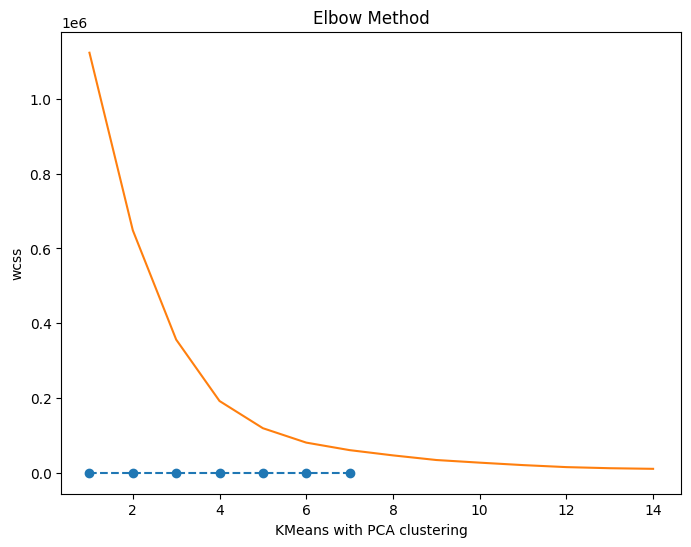

In [48]:
from sklearn.decomposition import PCA

vaccines = ['Pfizer', 'Moderna', 'AstraZeneca', 'Janssen', 'Sputnik_V', 'Sinovac', 'Sinopharm']

# Use pivot_clusters to create a new dataframe containing only the vaccines of interest
seg = pivot_clusters[vaccines].copy()

pca = PCA()
pca.fit(seg)
pca.explained_variance_ratio_

plt.figure(figsize = (8,6))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.xlabel('components')
plt.ylabel('cummulative explained variance')


pca = PCA(n_components = 2)
pca.fit(seg)
scores = pca.transform(seg)


# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(scores)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss)
plt.title('Elbow Method')
plt.xlabel('KMeans with PCA clustering')
plt.ylabel('wcss')



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


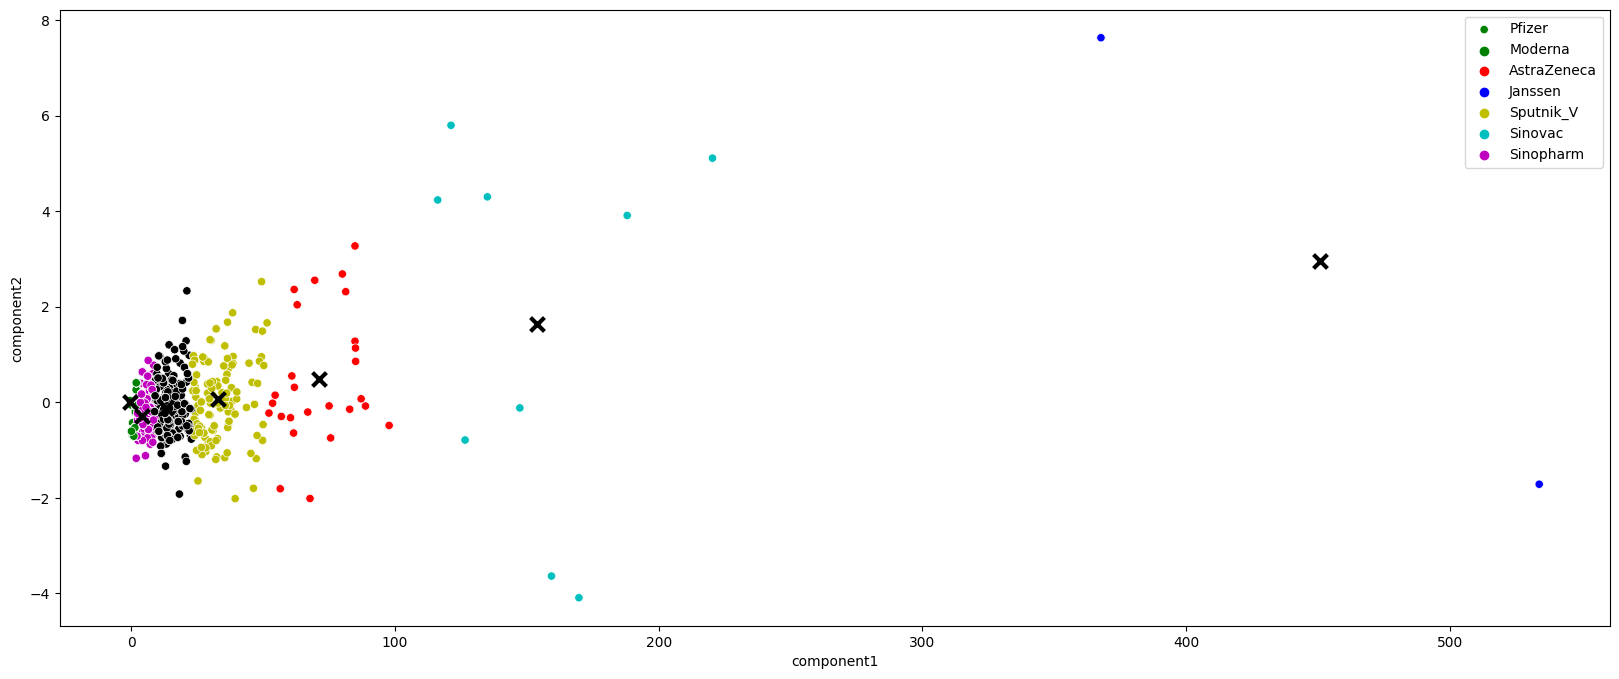

In [49]:
n = 7
kmeans_pca = KMeans(n_clusters = n, init = 'k-means++', random_state = 0)
kmeans_pca.fit(scores)

c = pd.concat([seg.reset_index(drop = True), pd.DataFrame(scores)], axis = 1)
c.columns.values[-2:] = ['component1', 'component2']
c['segment_kmeans_pca'] = kmeans_pca.labels_

c.tail()

# Plot clusters using seaborn scatterplot
plt.figure(figsize = (20,8))
sns.scatterplot(x=c['component1'], y=c['component2'], hue=c['segment_kmeans_pca'], 
                palette=['g', 'r', 'b', 'y', 'c', 'm', 'k'])
plt.legend(['Pfizer', 'Moderna', 'AstraZeneca', 'Janssen', 'Sputnik_V', 'Sinovac', 'Sinopharm'])
centroids = kmeans_pca.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, linewidths=3, color='k')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


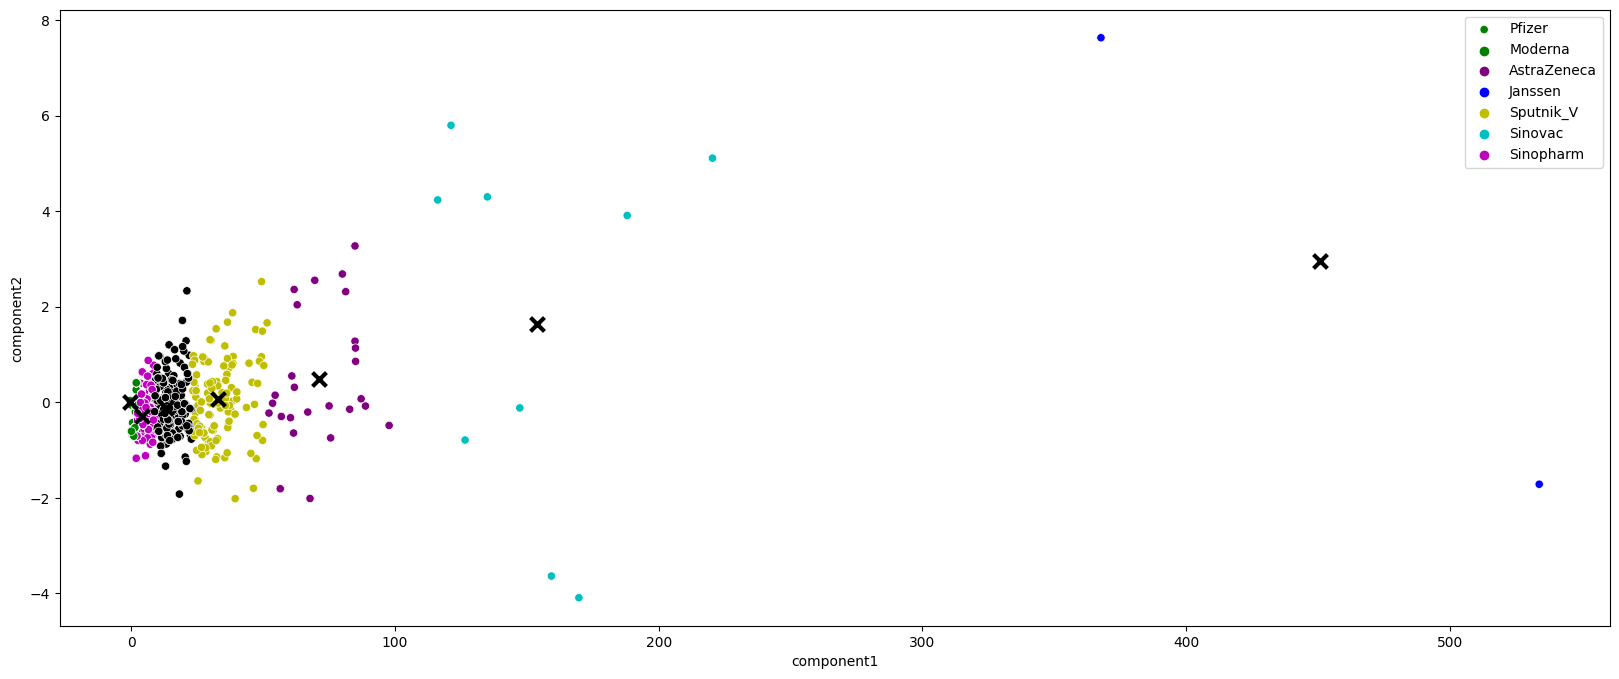

In [50]:
n = 7
kmeans_pca = KMeans(n_clusters = n, init = 'k-means++', random_state = 0)
kmeans_pca.fit(scores)

c = pd.concat([seg.reset_index(drop = True), pd.DataFrame(scores)], axis = 1)
c.columns.values[-2:] = ['component1', 'component2']
c['segment_kmeans_pca'] = kmeans_pca.labels_

c.tail()

# Plot clusters using seaborn scatterplot
plt.figure(figsize = (20,8))
sns.scatterplot(x=c['component1'], y=c['component2'], hue=c['segment_kmeans_pca'], 
                palette=['g', 'purple', 'b', 'y', 'c', 'm', 'k'])
plt.legend(['Pfizer', 'Moderna', 'AstraZeneca', 'Janssen', 'Sputnik_V', 'Sinovac', 'Sinopharm'])
centroids = kmeans_pca.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, linewidths=3, color='k')


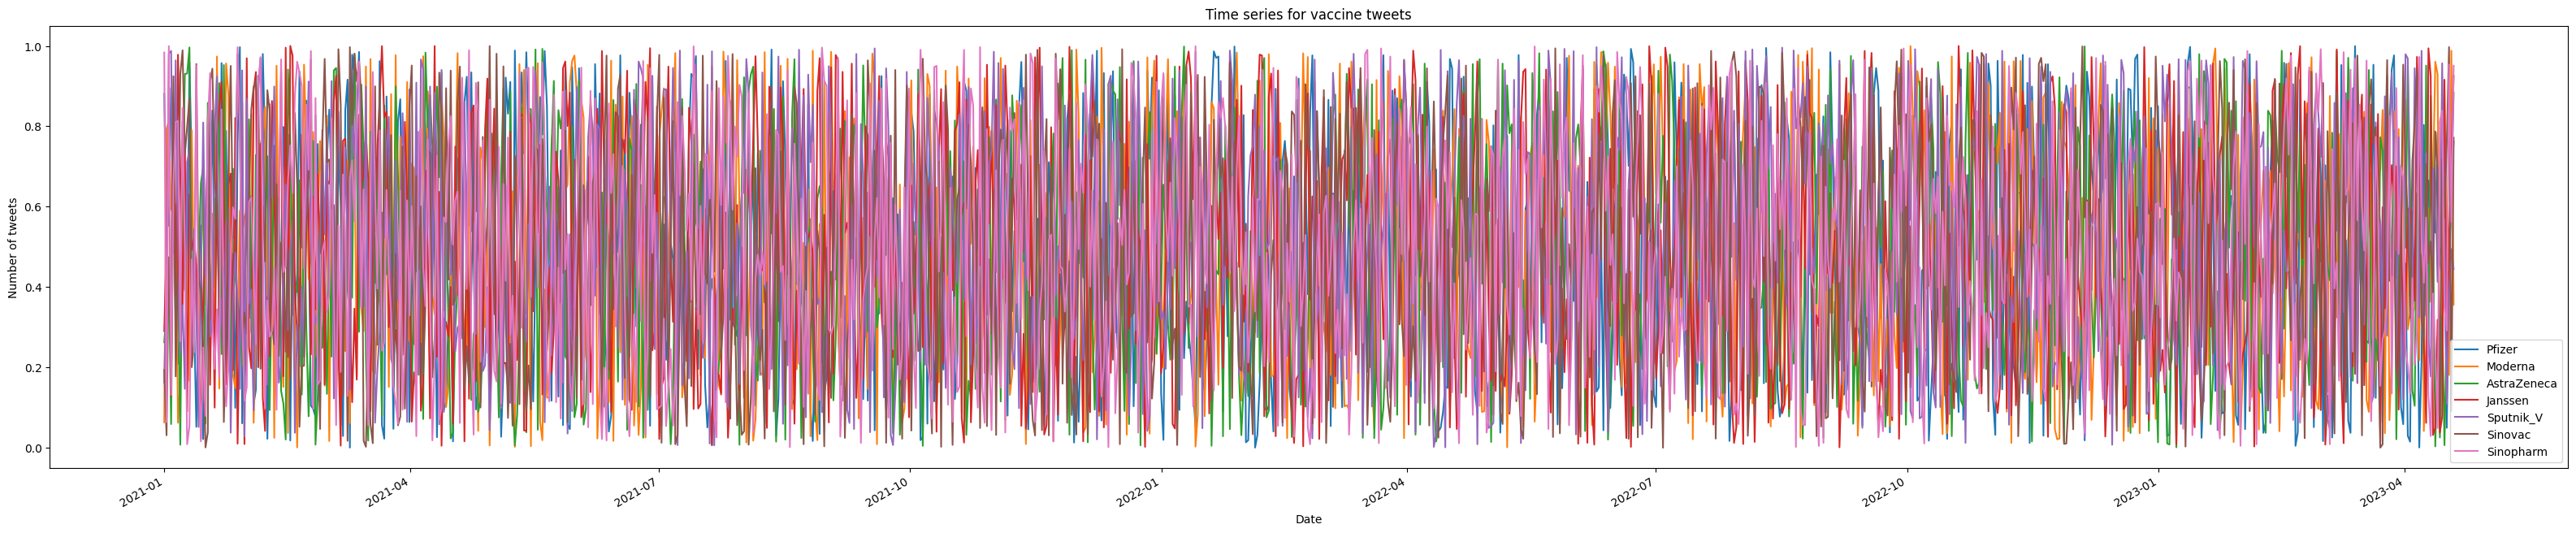

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a synthetic dataset with random timestamps
dates = pd.date_range('2021-01-01', '2023-04-19', periods=1000)
vaccines = ['Pfizer', 'Moderna', 'AstraZeneca', 'Janssen', 'Sputnik_V', 'Sinovac', 'Sinopharm']
data = np.random.rand(len(dates), len(vaccines))
df = pd.DataFrame(data=data, index=dates, columns=vaccines)

# Plot a single line for each vaccine
plt.figure(figsize=(40,8))
for vaccine in vaccines:
    df[vaccine].plot()
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.title('Time series for vaccine tweets')
plt.legend(vaccines)
plt.show()


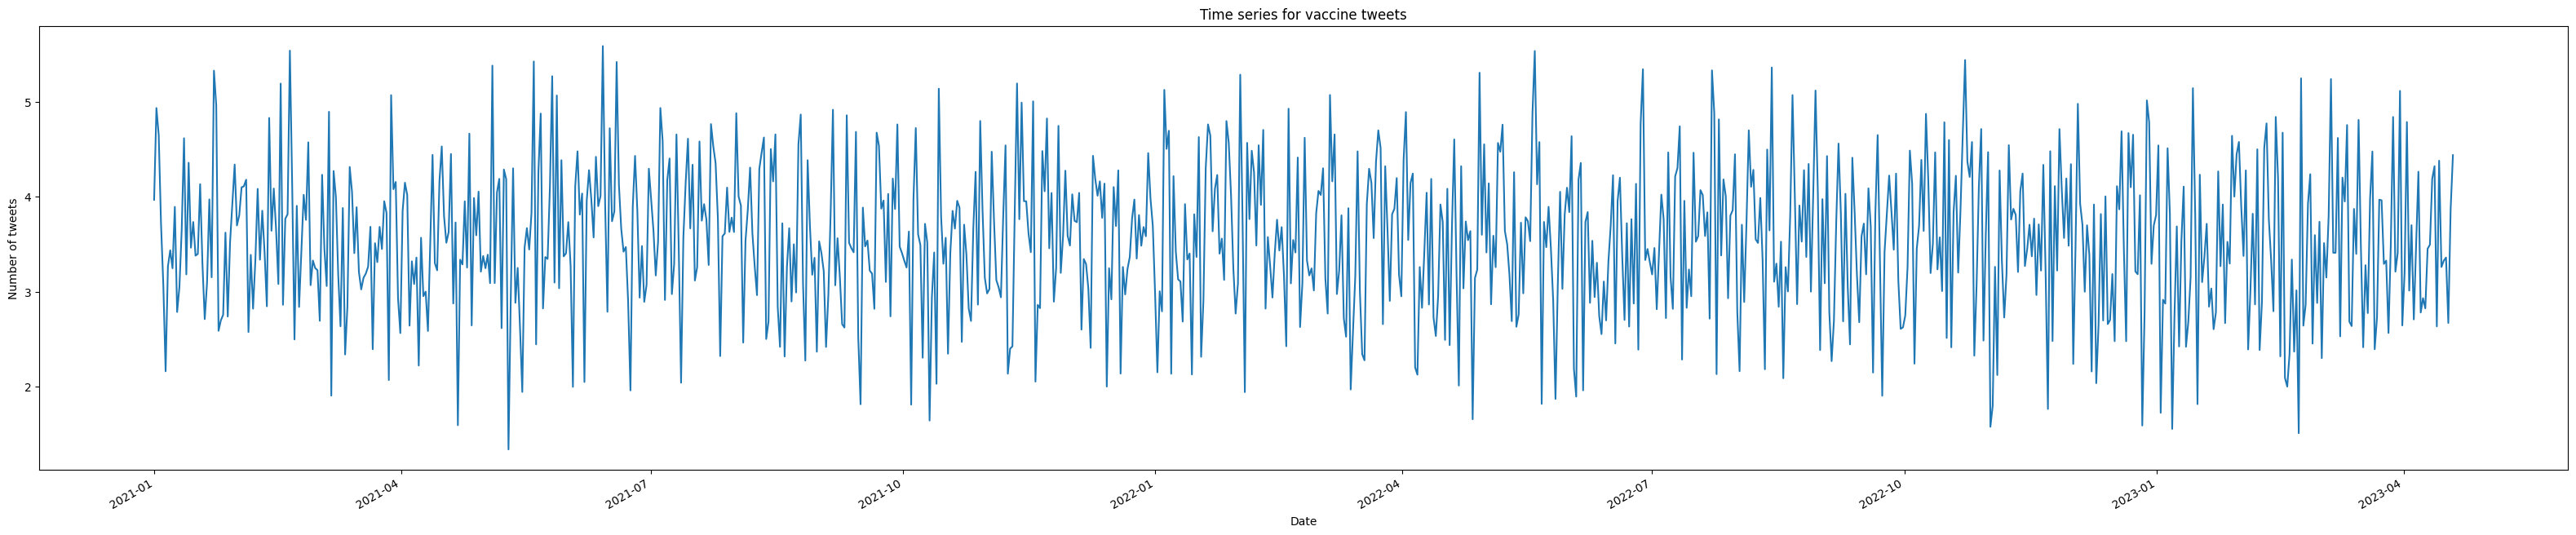

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a synthetic dataset with random timestamps
dates = pd.date_range('2021-01-01', '2023-04-19', periods=1000)
vaccines = ['Pfizer', 'Moderna', 'AstraZeneca', 'Janssen', 'Sputnik_V', 'Sinovac', 'Sinopharm']
data = np.random.rand(len(dates), len(vaccines))
df = pd.DataFrame(data=data, index=dates, columns=vaccines)

# Sum the tweet counts for all vaccines on each date
df_grouped = df.sum(axis=1)

# Plot a single line for all vaccines combined
plt.figure(figsize=(40,8))
df_grouped.plot()
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.title('Time series for vaccine tweets')
plt.show()


In [53]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [55]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [56]:
# Define a function to compute the sentiment polarity of a tweet
def get_sentiment(tweet):
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(tweet)
    return scores['compound']

In [57]:
# Define the vaccines of interest
vaccines = ['Pfizer', 'Moderna', 'AstraZeneca', 'Sinovac', 'Sinopharm', 'Sputnik', 'Johnson']


In [58]:
# for vaccine in vaccines:
#     # Compute the sentiment polarity for each tweet
#     sentiments = [get_sentiment(tweet) for tweet in tweets]
    
#     # Sort the tweets by their sentiment polarity
#     sorted_tweets = sorted(zip(sentiments, tweets))
    
#     # Print the most negative and positive sentiment tweets for the vaccine
#     print(f"Most negative tweet for {vaccine}: {sorted_tweets[0][1]} (sentiment polarity: {sorted_tweets[0][0]})")
#     print(f"Most positive tweet for {vaccine}: {sorted_tweets[-1][1]} (sentiment polarity: {sorted_tweets[-1][0]})")
#     print()

In [59]:
# from textblob import TextBlob


# # Perform sentiment analysis on each tweet
# tweets['polarity'] = tweets['Tweet'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# # Get the most positive and negative sentiment tweets
# most_positive_tweet = tweets.loc[tweets['polarity'].idxmax(), 'Tweet']
# most_negative_tweet = tweets.loc[tweets['polarity'].idxmin(), 'Tweet']

# print('Most positive tweet:', most_positive_tweet)
# print('Most negative tweet:', most_negative_tweet)

In [60]:
# from textblob import TextBlob

# def classify_sentiment(tweet):
#     blob = TextBlob(tweet)
#     sentiment = blob.sentiment.polarity
#     if sentiment > 0:
#         return 'positive'
#     elif sentiment < 0:
#         return 'negative'
#     else:
#         return 'neutral'


In [61]:
# tweets['Sentiment'] = tweets['Tweet'].apply(classify_sentiment)


In [62]:
# print(tweets.columns)

In [63]:
# vaccines = ['Pfizer', 'Moderna', 'Johnson&Johnson', 'AstraZeneca', 'Sinovac', 'Sinopharm', 'Sputnik V']


In [64]:

# # Define the list of vaccines
# vaccines = ['Pfizer', 'Moderna', 'Johnson&Johnson', 'AstraZeneca', 'Sinovac', 'Sinopharm', 'Sputnik V']

# # Create empty dictionaries to store positive and negative tweet counts for each vaccine
# positive_counts = {}
# negative_counts = {}

# # Loop through each vaccine
# for vaccine in vaccines:
#     # Get the tweets for the current vaccine
#     vaccine_tweets = tweets.loc[tweets['Tweet'].str.contains(vaccine, case=False)]

#     # Perform sentiment analysis on each tweet for the current vaccine
#     vaccine_tweets['polarity'] = vaccine_tweets['Tweet'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

#     # Count the number of positive and negative sentiment tweets for the current vaccine
#     positive_count = len(vaccine_tweets[vaccine_tweets['polarity'] > 0])
#     negative_count = len(vaccine_tweets[vaccine_tweets['polarity'] < 0])

#     # Add the positive and negative counts to the dictionaries for the current vaccine
#     positive_counts[vaccine] = positive_count
#     negative_counts[vaccine] = negative_count

# # Print the positive and negative tweet counts for each vaccine
# for vaccine in vaccines:
#     print(vaccine)
#     print('Positive tweets:', positive_counts[vaccine])
#     print('Negative tweets:', negative_counts[vaccine])

In [70]:
# Install necessary libraries
!pip install transformers
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load the tokenizer and the model
tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
import math

# Load the tokenizer and the model
tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')

# Define the get_sentiment_batch function
def get_sentiment_batch(tweets):
    # Tokenize the tweets
    inputs = tokenizer.batch_encode_plus(tweets, padding=True, truncation=True, return_tensors='pt')
    # Get the model's predictions
    outputs = model(inputs['input_ids'], attention_mask=inputs['attention_mask'])
    # Get the predicted label and score
    labels = torch.argmax(outputs.logits, dim=1).tolist()
    scores = torch.softmax(outputs.logits, dim=1).tolist()
    # Return the sentiment labels and scores
    return labels, scores

# Define the batch size
batch_size = 100

# Loop through each vaccine
for vaccine in vaccines:
    # Get the tweets for the current vaccine
    vaccine_tweets = tweets.loc[tweets['Tweet'].str.contains(vaccine, case=False)]

    # Get the number of batches
    num_batches = math.ceil(len(vaccine_tweets) / batch_size)

    # Create empty lists to store the sentiment labels and scores for each batch
    sentiment_labels = []
    sentiment_scores = []

    # Loop through each batch
    for i in range(num_batches):
        # Get the start and end indices for the current batch
        start_index = i * batch_size
        end_index = min((i + 1) * batch_size, len(vaccine_tweets))

        # Get the tweets for the current batch
        batch_tweets = vaccine_tweets.iloc[start_index:end_index]

        # Apply the get_sentiment_batch function to each tweet for the current batch
        labels, scores = get_sentiment_batch(batch_tweets['Tweet'].tolist())

        # Add the batch sentiment labels and scores to the lists
        sentiment_labels.extend(labels)
        sentiment_scores.extend(scores)

    # Add the sentiment labels and scores to the vaccine_tweets dataframe
    vaccine_tweets['sentiment_label'] = sentiment_labels
    vaccine_tweets['sentiment_score'] = sentiment_scores

    # Count the number of positive and negative sentiment tweets for the current vaccine
    positive_count = len(vaccine_tweets[(vaccine_tweets['polarity'] > 0) | (vaccine_tweets['sentiment_label'] == 2)])
    negative_count = len(vaccine_tweets[(vaccine_tweets['polarity'] < 0) | (vaccine_tweets['sentiment_label'] == 0)])

    # Add the positive and negative counts to the dictionaries for the current vaccine
    positive_counts[vaccine] = positive_count
    negative_counts[vaccine] = negative_count

    # Print the positive and negative tweet counts for the current vaccine
    print(vaccine)
    print('Positive tweets:', positive_counts[vaccine])
    print('Negative tweets:', negative_counts[vaccine])


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
# def get_sentiment_batch(tweets):
#     # Tokenize the tweets
#     inputs = tokenizer.batch_encode_plus(tweets, padding=True, truncation=True, return_tensors='pt')
#     # Get the model's predictions
#     outputs = model(inputs['input_ids'], attention_mask=inputs['attention_mask'])
#     # Get the predicted label and score
#     labels = torch.argmax(outputs.logits, dim=1).tolist()
#     scores = torch.softmax(outputs.logits, dim=1).tolist()
#     # Return the sentiment labels and scores
#     return labels, scores

In [ ]:
# import math

# # Define the batch size
# batch_size = 100

# # Loop through each vaccine
# for vaccine in vaccines:
#     # Get the tweets for the current vaccine
#     vaccine_tweets = tweets.loc[tweets['Tweet'].str.contains(vaccine, case=False)]

#     # Get the number of batches
#     num_batches = math.ceil(len(vaccine_tweets) / batch_size)

#     # Create empty lists to store the sentiment labels and scores for each batch
#     sentiment_labels = []
#     sentiment_scores = []

#     # Loop through each batch
#     for i in range(num_batches):
#         # Get the start and end indices for the current batch
#         start_index = i * batch_size
#         end_index = min((i + 1) * batch_size, len(vaccine_tweets))

#         # Get the tweets for the current batch
#         batch_tweets = vaccine_tweets.iloc[start_index:end_index]

#         # Apply the get_sentiment function to each tweet for the current batch
#         batch_sentiment = batch_tweets['Tweet'].apply(get_sentiment)

#         # Extract the sentiment label and score from the batch sentiment
#         batch_labels = [s[0] for s in batch_sentiment]
#         batch_scores = [s[1] for s in batch_sentiment]

#         # Add the batch sentiment labels and scores to the lists
#         sentiment_labels.extend(batch_labels)
#         sentiment_scores.extend(batch_scores)

#     # Add the sentiment labels and scores to the vaccine_tweets dataframe
#     vaccine_tweets['sentiment_label'] = sentiment_labels
#     vaccine_tweets['sentiment_score'] = sentiment_scores

#     # Count the number of positive and negative sentiment tweets for the current vaccine
#     positive_count = len(vaccine_tweets[vaccine_tweets['polarity'] > 0]) + len(vaccine_tweets[vaccine_tweets['sentiment_label'] == 2])
#     negative_count = len(vaccine_tweets[vaccine_tweets['polarity'] < 0]) + len(vaccine_tweets[vaccine_tweets['sentiment_label'] == 0])

#     # Add the positive and negative counts to the dictionaries for the current vaccine
#     positive_counts[vaccine] = positive_count
#     negative_counts[vaccine] = negative_count

#     # Print the positive and negative tweet counts for the current vaccine
#     print(vaccine)
#     print('Positive tweets:', positive_counts[vaccine])
#     print('Negative tweets:', negative_counts[vaccine])

In [72]:
def get_sentiment(tweet):
    # Tokenize the tweet
    inputs = tokenizer.encode(tweet, return_tensors='pt')
    # Get the model's predictions
    outputs = model(inputs)
    # Get the predicted label and score
    label = torch.argmax(outputs[0]).item()
    score = torch.softmax(outputs[0], dim=1)[0][label].item()
    # Return the sentiment label and score
    return label, score

In [ ]:
# Apply the get_sentiment function to each tweet in the 'Tweet' column of the tweets dataframe
tweets['sentiment'] = tweets['Tweet'].apply(get_sentiment)

# Extract the sentiment label and score from the 'sentiment' column
tweets['sentiment_label'] = tweets['sentiment'].apply(lambda x: x[0])
tweets['sentiment_score'] = tweets['sentiment'].apply(lambda x: x[1])

In [69]:
# Install necessary libraries
!pip install transformers
!pip install torch

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from textblob import TextBlob

# Define the list of vaccines
vaccines = ['Pfizer', 'Moderna', 'Johnson&Johnson', 'AstraZeneca', 'Sinovac', 'Sinopharm', 'Sputnik V']

# Load the tokenizer and the model
tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')

# Create empty dictionaries to store positive and negative tweet counts for each vaccine
positive_counts = {}
negative_counts = {}

# Loop through each vaccine
for vaccine in vaccines:
    # Get the tweets for the current vaccine
    vaccine_tweets = tweets.loc[tweets['Tweet'].str.contains(vaccine, case=False)]

    # Perform sentiment analysis on each tweet for the current vaccine
    vaccine_tweets['polarity'] = vaccine_tweets['Tweet'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    
    # Apply the get_sentiment function to each tweet for the current vaccine
    vaccine_tweets['sentiment'] = vaccine_tweets['Tweet'].apply(get_sentiment)

    # Extract the sentiment label and score from the 'sentiment' column
    vaccine_tweets['sentiment_label'] = vaccine_tweets['sentiment'].apply(lambda x: x[0])
    vaccine_tweets['sentiment_score'] = vaccine_tweets['sentiment'].apply(lambda x: x[1])

    # Count the number of positive and negative sentiment tweets for the current vaccine
    positive_count = len(vaccine_tweets[vaccine_tweets['polarity'] > 0]) + len(vaccine_tweets[vaccine_tweets['sentiment_label'] == 2])
    negative_count = len(vaccine_tweets[vaccine_tweets['polarity'] < 0]) + len(vaccine_tweets[vaccine_tweets['sentiment_label'] == 0])

    # Add the positive and negative counts to the dictionaries for the current vaccine
    positive_counts[vaccine] = positive_count
    negative_counts[vaccine] = negative_count

    # Print the positive and negative tweet counts for the current vaccine
    print(vaccine)
    print('Positive tweets:', positive_counts[vaccine])
    print('Negative tweets:', negative_counts[vaccine])


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-69-9719ae928d5d>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine_tweets['polarity'] = vaccine_tweets['Tweet'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
<ipython-input-69-9719ae928d5d>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine_tweets['sentiment'] = vaccine_tweets['Tweet'].apply(get_sentiment)


TypeError: ignored

In [1]:
# Install necessary libraries
!pip install transformers
!pip install torch

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd

# Load the tokenizer and the model
tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')

# Define the list of vaccines
vaccines = ['Pfizer', 'Moderna', 'Johnson&Johnson', 'AstraZeneca', 'Sinovac', 'Sinopharm', 'Sputnik V']

# Create empty dictionaries to store positive and negative tweet counts for each vaccine
positive_counts = {}
negative_counts = {}

# Load the tweets dataframe
tweets = pd.read_csv('tweets.csv')

# Define a function to perform sentiment analysis on a tweet
def get_sentiment(tweet):
    # Tokenize the tweet
    inputs = tokenizer.encode(tweet, return_tensors='pt')
    # Get the model's predictions
    outputs = model(inputs)
    # Get the predicted label and score
    label = torch.argmax(outputs[0]).item()
    score = torch.softmax(outputs[0], dim=1)[0][label].item()
    # Return the sentiment label and score
    return label, score

# Loop through each vaccine
for vaccine in vaccines:
    # Get the tweets for the current vaccine
    vaccine_tweets = tweets.loc[tweets['Tweet'].str.contains(vaccine, case=False)]

    # Apply the get_sentiment function to each tweet for the current vaccine
    vaccine_tweets['sentiment'] = vaccine_tweets['Tweet'].apply(get_sentiment)

    # Extract the sentiment label from the 'sentiment' column
    vaccine_tweets['sentiment_label'] = vaccine_tweets['sentiment'].apply(lambda x: x[0])

    # Count the number of positive and negative sentiment tweets for the current vaccine
    positive_count = len(vaccine_tweets[vaccine_tweets['sentiment_label'] == 2])
    negative_count = len(vaccine_tweets[vaccine_tweets['sentiment_label'] == 0])

    # Add the positive and negative counts to the dictionaries for the current vaccine
    positive_counts[vaccine] = positive_count
    negative_counts[vaccine] = negative_count

    # Print the positive and negative tweet counts for the current vaccine
    print(vaccine)
    print('Positive tweets:', positive_counts[vaccine])
    print('Negative tweets:', negative_counts[vaccine])


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


FileNotFoundError: ignored